To do:
- fix latex (stuff in onenote
- fix b splines knots / calculations
 (check basis of support)
 - fix coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.pyplot as plt
import random
from sigmoid_learner import *
from spline_learner import *

In [2]:
a = 150
b = 0.1
MEAS_VAR = 1
PROC_VAR = 1
AVAR = 1
BVAR = 1
GIBBS_VAR = 1
NSAMPS = 25
NPTSPERSAMP = 20
sl = SigLearner(a,b,MEAS_VAR,PROC_VAR,AVAR,BVAR,GIBBS_VAR,NSAMPS,NPTSPERSAMP)

0.84


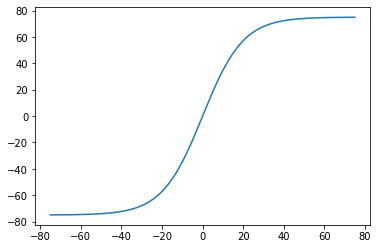

In [3]:
plt.plot(sl.time, sl.f)
frac_changing = spline_change_pts(sl.states)
print(frac_changing)

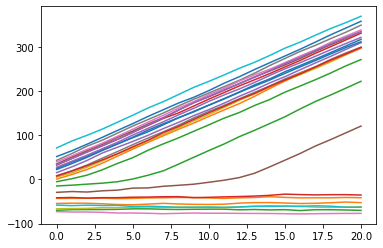

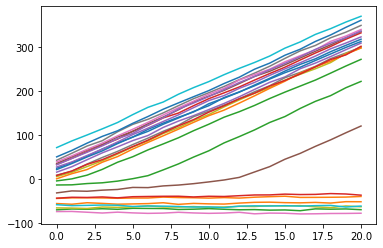

In [4]:
for s in sl.states:
    plt.plot(s)
plt.show()

for s in sl.observations:
    plt.plot(s)
plt.show()

In [5]:
trace_x,trace_theta = sl.run()

/Users/jendawk/Documents/GeorgTravisRot/POE_learner/sigmoid_learner.py:31: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(pnew - pold)
/Users/jendawk/Documents/GeorgTravisRot/POE_learner/sigmoid_learner.py:39: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(pnew - pold)
/Users/jendawk/Documents/GeorgTravisRot/POE_learner/sigmoid_learner.py:61: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(num - dem)


KeyboardInterrupt: 

In [ ]:
for tr in trace_theta:
    
    plt.plot(range(len(tr)),list(zip(*tr))[0],label = 'a')
    plt.plot(range(len(tr)),list(zip(*tr))[1],label = 'b')
    plt.plot(range(len(tr)),20*np.ones(len(tr)),label = 'True a =20')
    plt.plot(range(len(tr)),.1*np.ones(len(tr)),label = 'True b = 0.1')
    plt.legend()
    plt.xlabel('Iteration')
    plt.show()
# plt.plot(range(len(trace_x)),trace_x)

In [ ]:
for i,tr in enumerate(trace_x):
    plt.figure()
    for tr2 in tr[-100:-1]:
        plt.plot(np.arange(len(tr2)),tr2,c='green')

    plt.plot(np.arange(len(tr[-1])),tr[-1],label = 'Inferred x',c='green')
    plt.plot(np.arange(len(sl.observations[i])),sl.observations[i],marker = '.',label = 'observed y')


    plt.plot(np.arange(len(sl.states[i])),sl.states[i],marker='*',label = 'True x')
    plt.legend()
    plt.xlabel('Iteration')
    plt.show()

In [ ]:
# spl = SplineLearner(a=100,b=.1,MEAS_VAR=1,PROC_VAR=1,AVAR=150,BVAR=1,GIBBS_VAR=1,NSAMPS=25,NPTSPERSAMP=20)
pl = SplineLearner(100,.1,1,1,150,1,1,25,20)
trace_x2, trace_theta2 = spl.run()      

In [ ]:
betas_true = sigmoid(np.linspace(-50,50,1000), spl.true_a,spl.true_b) - 50
# betas_true = sigmoid(spl.knots,spl.true_a,spl.true_b)

In [ ]:
plt.figure()
plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true betas',c='red')
for k,tr in enumerate(trace_theta2): 
    for i in range(500):
        plt.plot(np.linspace(-50,50,len(list(zip(*tr))[0][i])), list(zip(*tr))[0][i],c='green')
        if (i+1)%100==0:
            plt.title('Sample ' + str(k) + ', Iterations ' + str(i+1-100) + ' to ' + str(i+1))
            plt.legend()
            plt.show()
            plt.figure()
            plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true',c='red')
#     plt.plot()
#     import pdb; pdb.set_trace()
#     plt.plot(range(len(tr)),list(zip(*tr))[0],label = 'a')
#     plt.plot(range(len(tr)),list(zip(*tr))[1],label = 'b')
#     plt.plot(range(len(tr)),20*np.ones(len(tr)),label = 'True a =20')
#     plt.plot(range(len(tr)),.1*np.ones(len(tr)),label = 'True b = 0.1')
#     plt.legend()
#     plt.xlabel('Iteration')
#     plt.show()
# plt.plot(range(len(trace_x)),trace_x)

In [ ]:
for i,tr in enumerate(trace_x2):
    plt.figure()
    for tr2 in tr[-100:-1]:
        plt.plot(np.arange(len(tr2)),tr2,c='green')

    plt.plot(np.arange(len(tr[-1])),tr[-1],label = 'Inferred x',c='green')
    plt.plot(np.arange(len(spl.observations[i])),spl.observations[i],marker = '.',label = 'observed y')


    plt.plot(np.arange(len(spl.states[i])),spl.states[i],marker='*',label = 'True x')
    plt.legend()
    plt.xlabel('Iteration')
    plt.show()

# Spline Learner POE

In [1]:
from spline_learner_poe import *
import matplotlib.pyplot as plt
np.random.seed(4)

In [2]:
# (true_a, true_b, MEAS_VAR, PROC_VAR, THETA_VAR, AVAR, BVAR, GIBBS_VAR, 
# POE_VAR, NSAMPS, NPTSPERSAMP,DT)

# sigmoid ranges from -50 to 50 so set noise to be 10% of this range; var = 10
ta = -100
tb = 0.1
meas_var = 5
proc_var = 1
theta_var = 1e5
a_var = 100
b_var = 1
gibbs_var = 5
poe_var = 10
nsamps = 5
nptspersamp = 20
dt = .1
spl = SplineLearnerPOE(ta,tb,meas_var,proc_var,theta_var,a_var,b_var,
                       poe_var,nsamps,nptspersamp,dt)

/Users/jendawk/Documents/GeorgTravisRot/POE_learner/spline_learner_poe.py:42: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.true_betas = [np.linalg.lstsq(self.true_bmat1[i],self.ys[i])[0] for i in range(len(self.true_bmat1))]


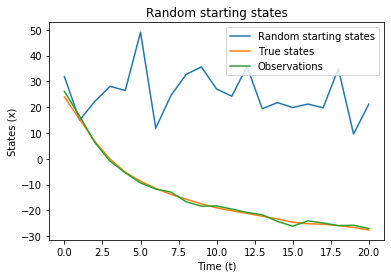

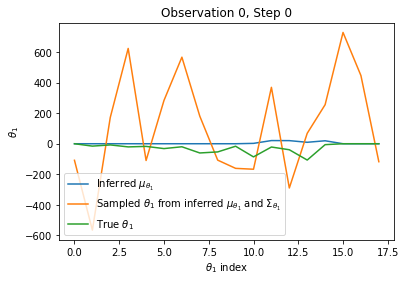

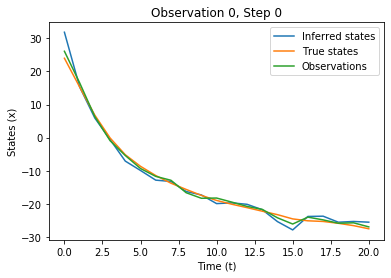

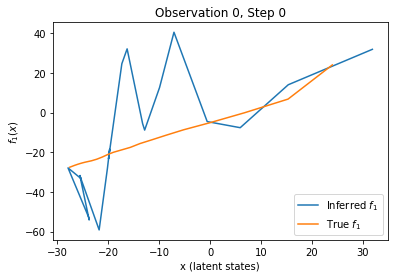

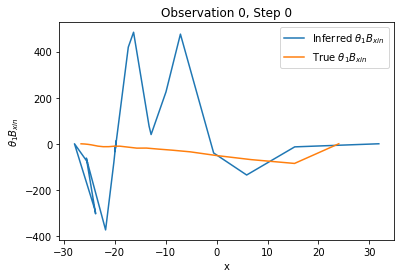

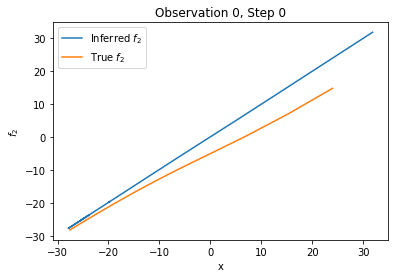

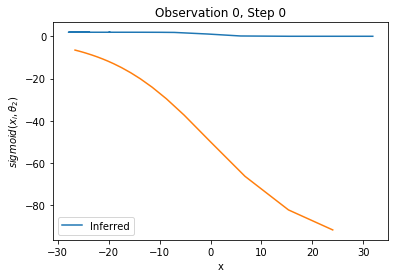

[1.9108293203754974, -0.4289860500219819]
Meas Var:1
Proc Var:511683.1405539358
POE Var:1708141.6346978159


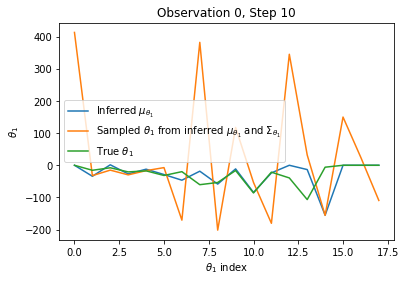

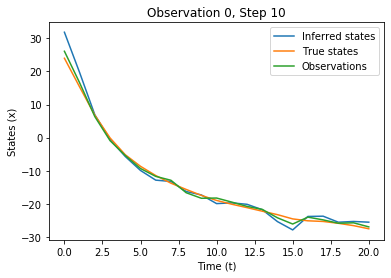

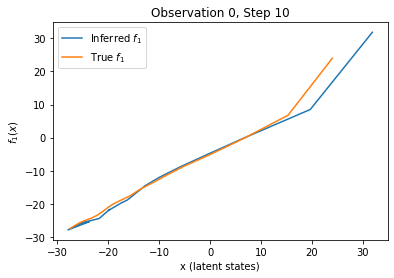

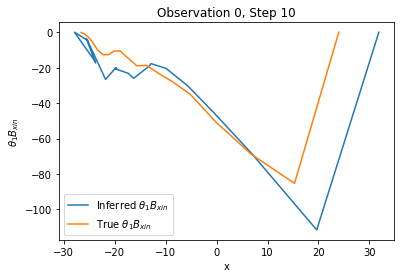

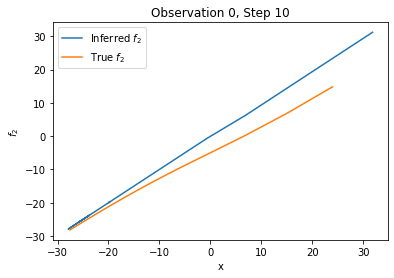

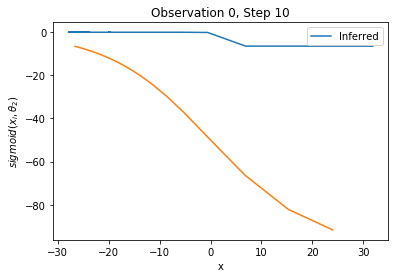

[-6.438051050532631, 7.258082815194856]
Meas Var:1
Proc Var:105.32645272777522
POE Var:10.86178326517032
Observation 0 Complete


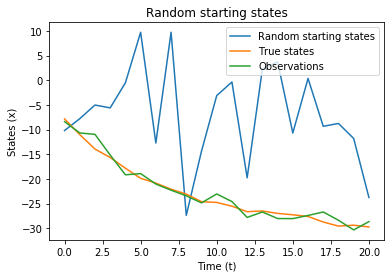

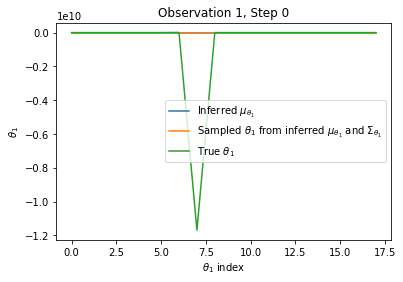

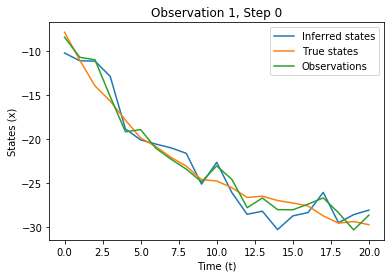

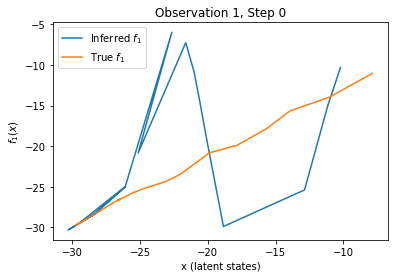

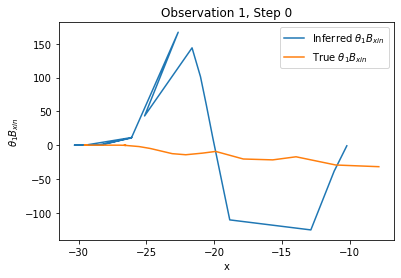

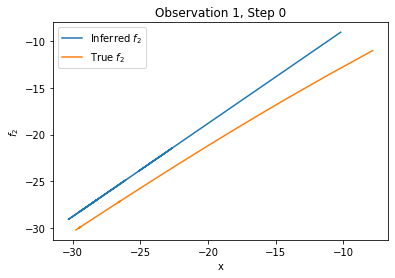

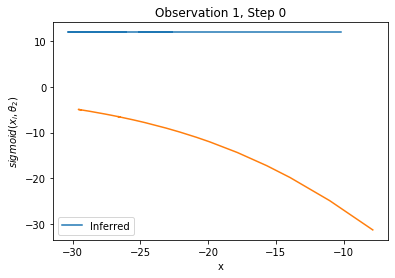

[11.982969852896312, -1.5728847037723273]
Meas Var:1
Proc Var:1228043.344318253
POE Var:2252443.1208337303


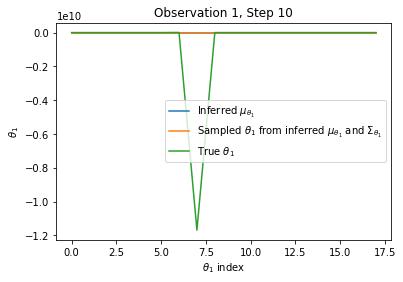

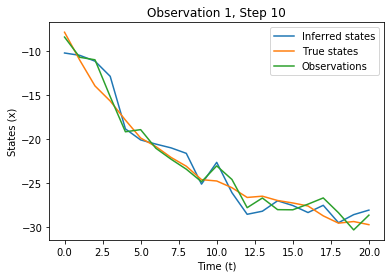

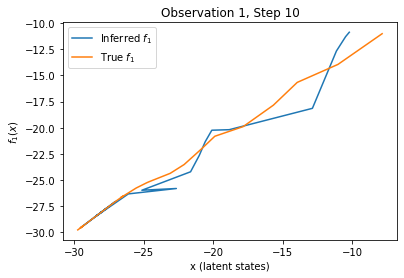

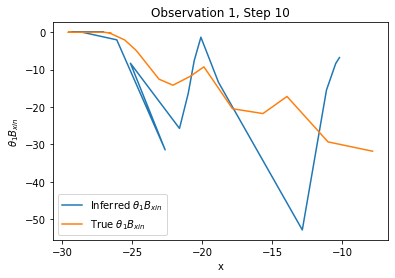

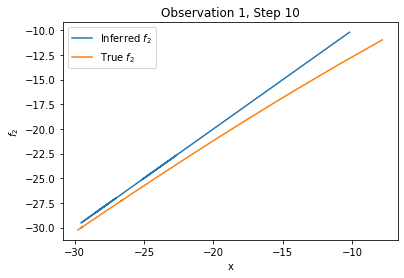

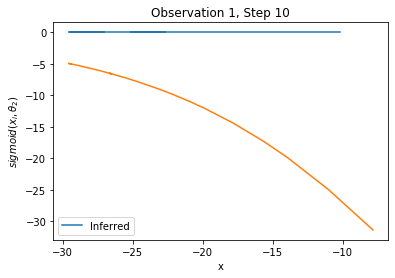

[-17.993390357800646, 1.5002608274385754]
Meas Var:1
Proc Var:15.22399561374101
POE Var:10.427313346192447
Observation 1 Complete


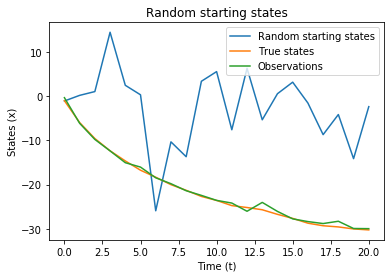

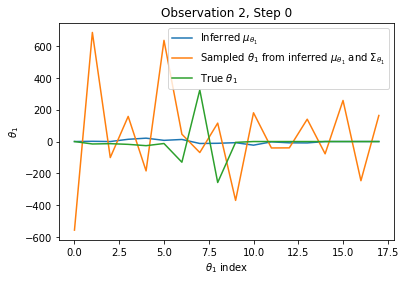

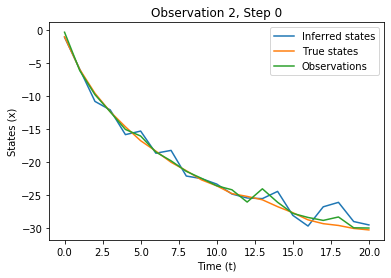

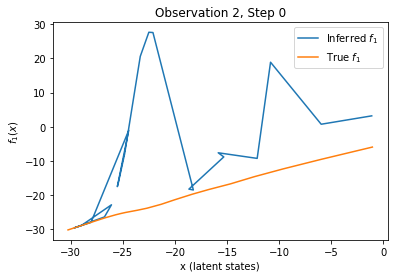

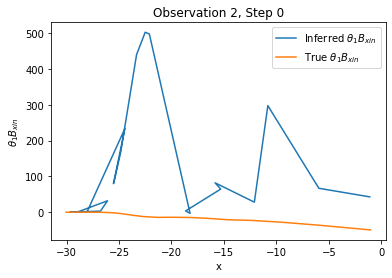

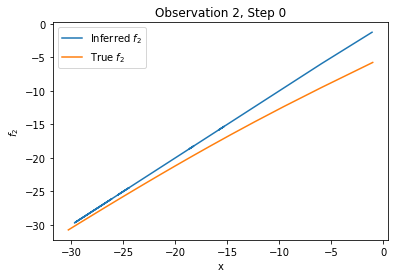

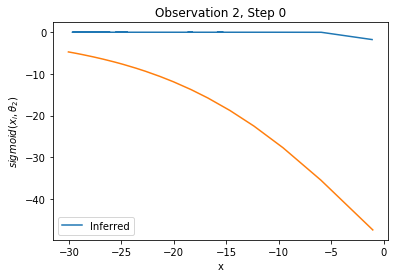

[-7.946408442669672, 1.1493968321603079]
Meas Var:1
Proc Var:663064.5995681646
POE Var:1415957.110968869


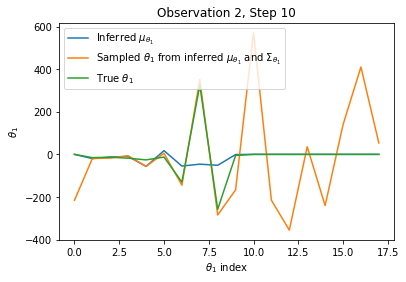

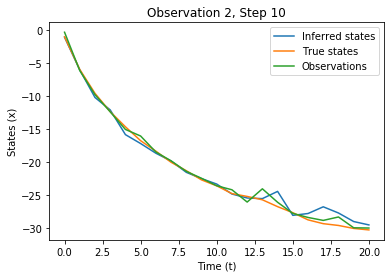

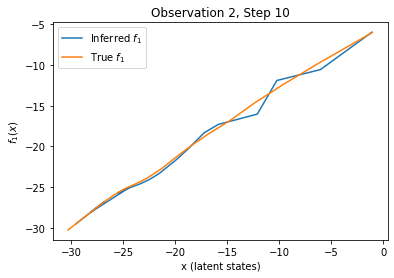

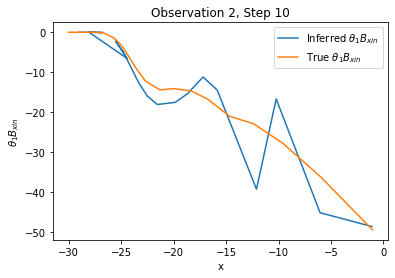

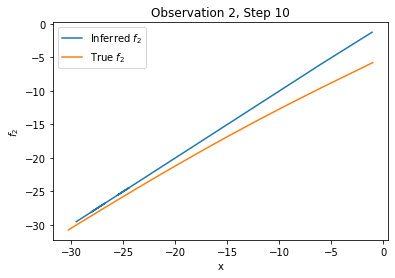

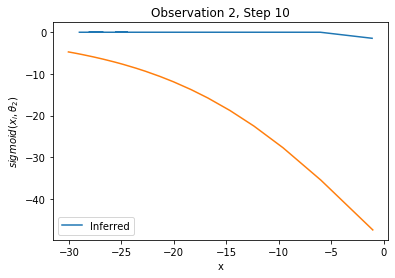

[-20.973551237098906, 2.372302553581894]
Meas Var:1
Proc Var:12.455870012397485
POE Var:10.16790945745241
Observation 2 Complete


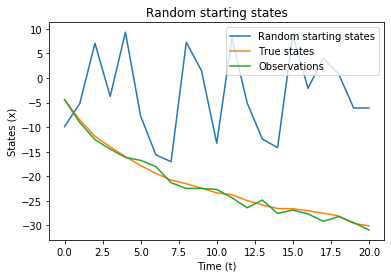

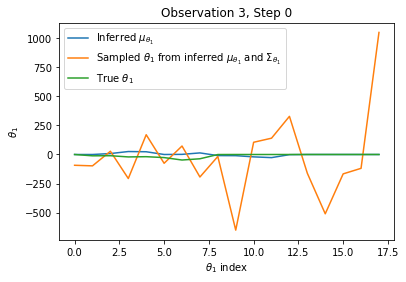

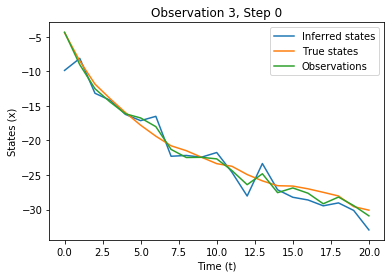

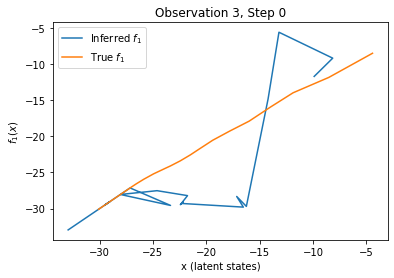

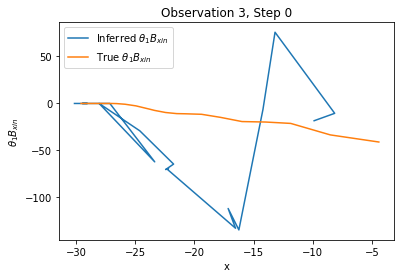

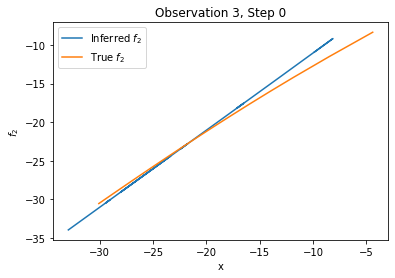

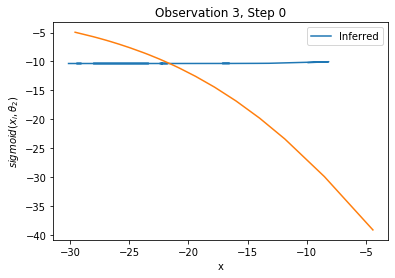

[-10.347405270909, -0.42731962039226007]
Meas Var:1
Proc Var:954824.639009981
POE Var:1978507.181361424


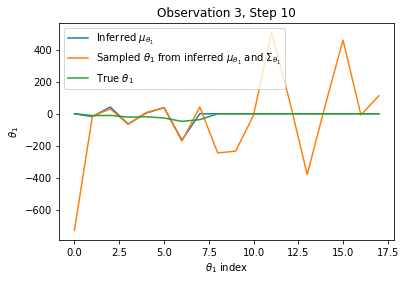

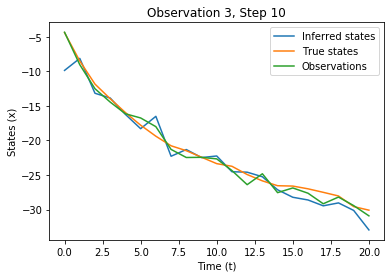

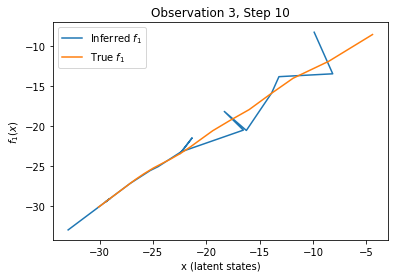

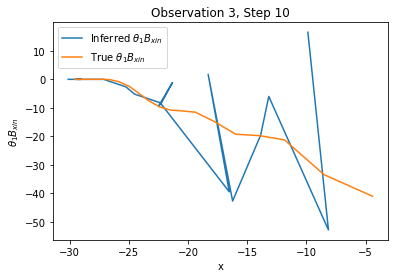

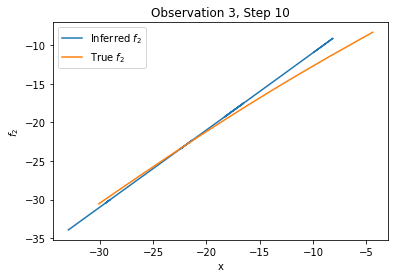

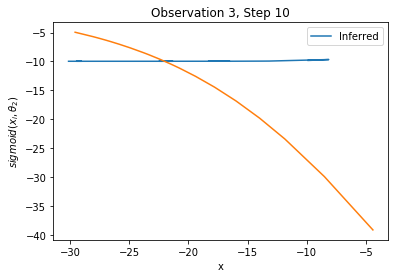

[-9.96157769600352, -0.42731962039226007]
Meas Var:1
Proc Var:18.23696753444995
POE Var:11.360191776577166
Observation 3 Complete


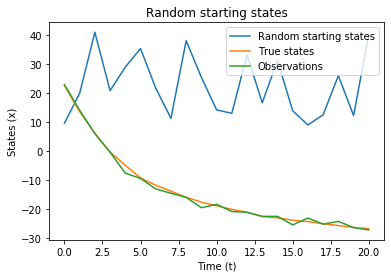

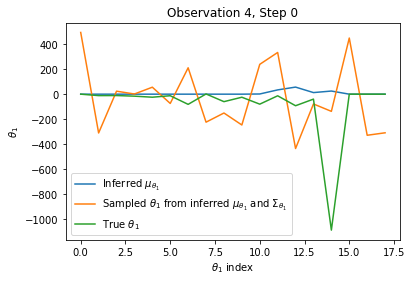

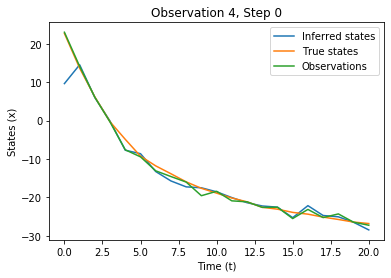

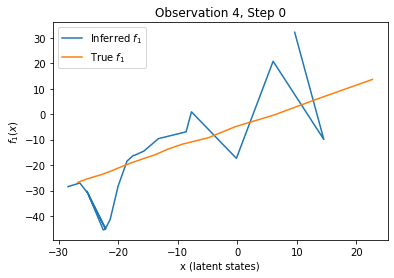

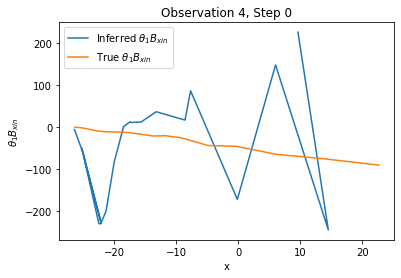

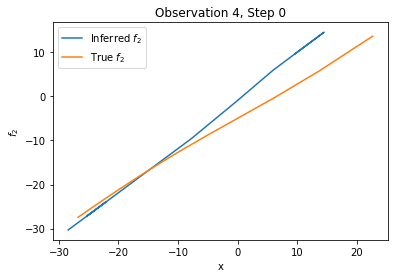

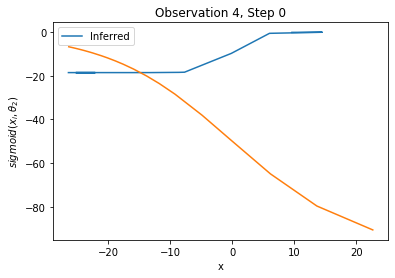

[-18.502794166044602, -0.596750154879132]
Meas Var:1
Proc Var:696121.5639421247
POE Var:1769515.5071053917


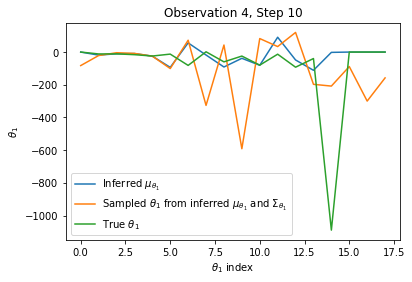

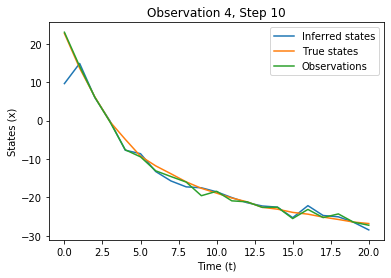

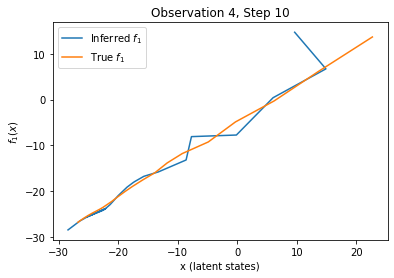

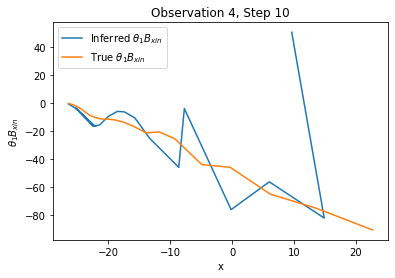

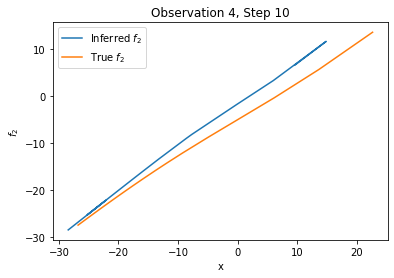

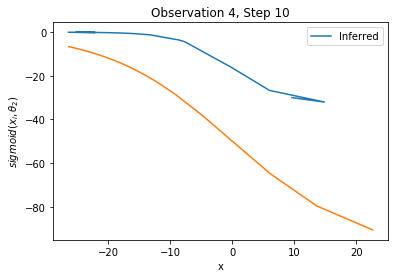

[-32.88574547255916, 0.24346613355285773]
Meas Var:1
Proc Var:13.40997884134836
POE Var:10.920798534670713
Observation 4 Complete


In [36]:
gibbs_steps = 15
spl.poe_var = np.eye(spl.states[0].shape[0])
spl.pvar = 100
spl.mvar = 1
spl.gibbs_var = 5
spl.run(gibbs_steps) 

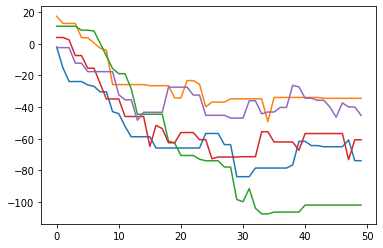

In [29]:
for i in range(len(spl.trace_a)):
    plt.plot(spl.trace_a[i]) 
    

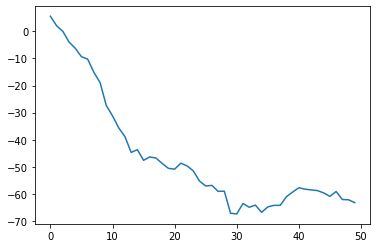

In [32]:
plt.plot(np.mean(np.array(spl.trace_a),0))

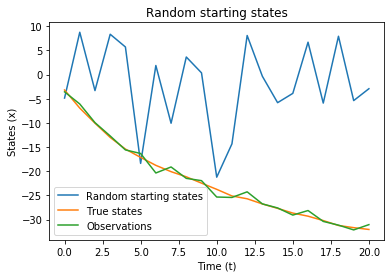

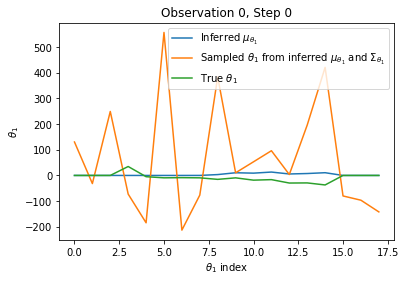

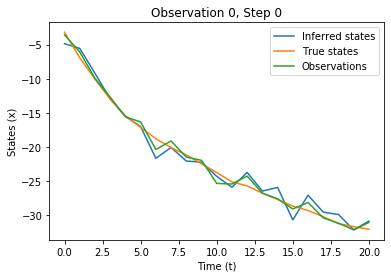

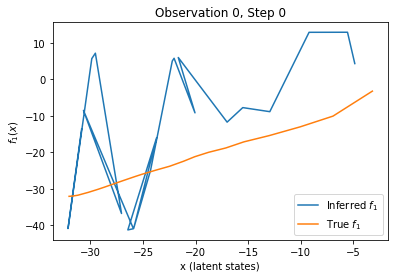

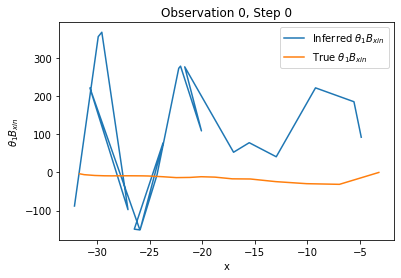

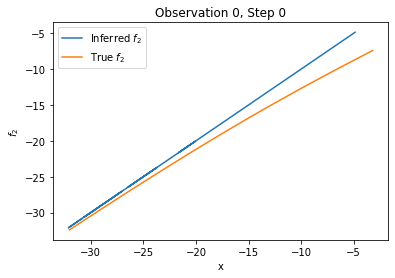

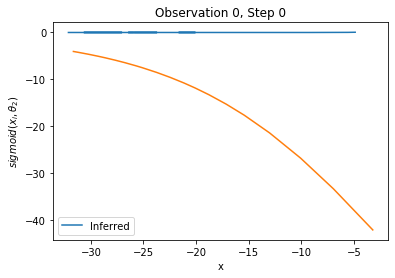

[10.251970807591812, 1.0897235606854228]
Step 0
Meas Var:1
Proc Var:1208955.9051691971
POE Var:2772483.69329841
Observation 0 Complete


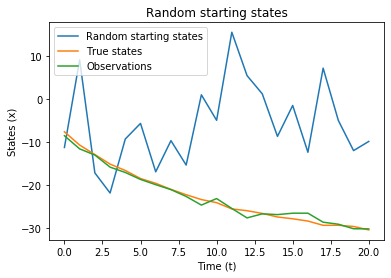

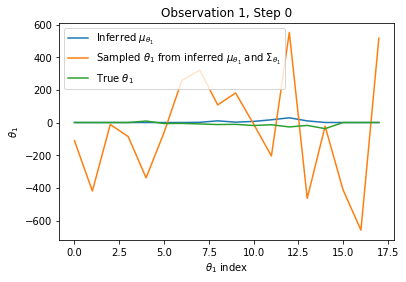

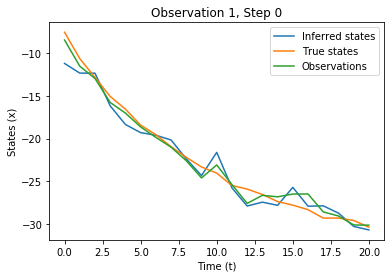

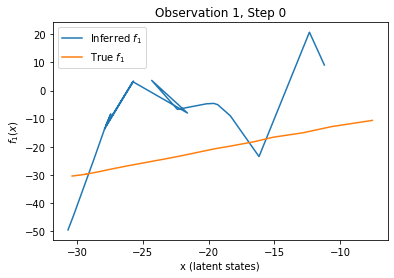

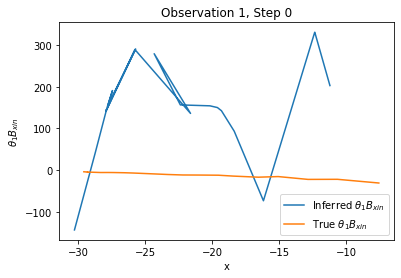

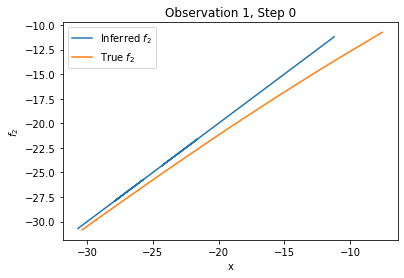

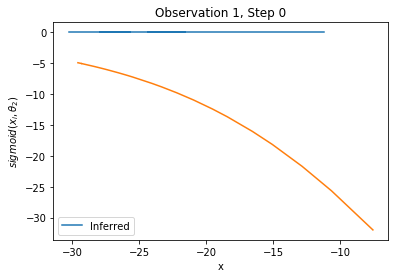

[5.810701593698537, 1.9614521455102991]
Step 0
Meas Var:1
Proc Var:827863.573329724
POE Var:1727506.0709663513
Observation 1 Complete


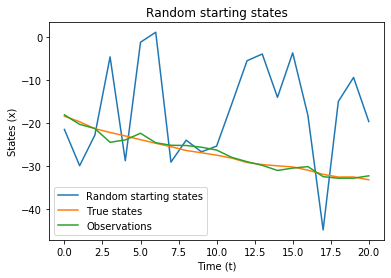

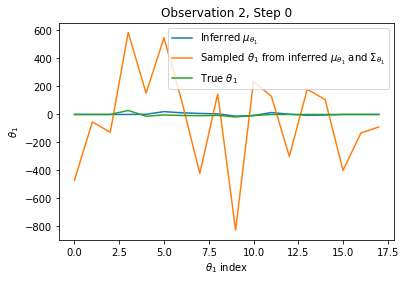

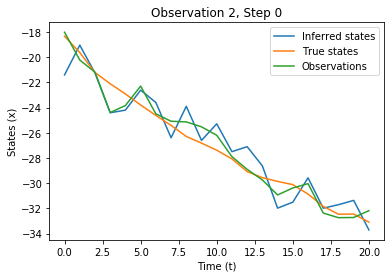

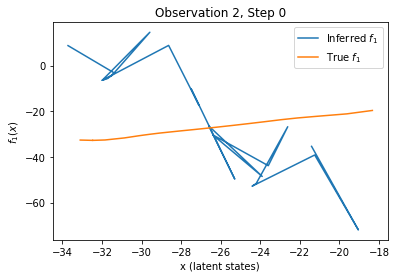

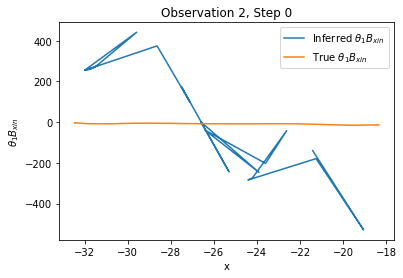

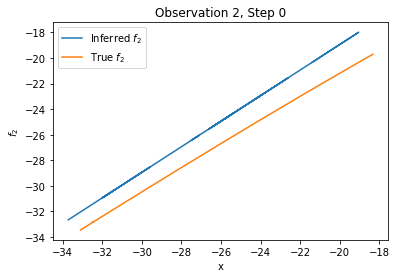

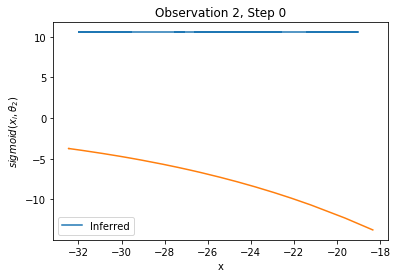

[10.573065192655395, -1.361906648609779]
Step 0
Meas Var:1
Proc Var:1140178.2393991728
POE Var:2404864.532620442
Observation 2 Complete


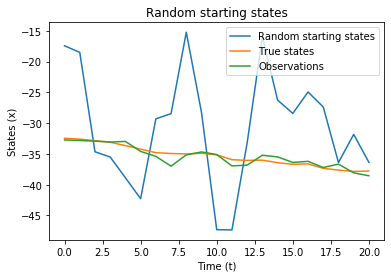

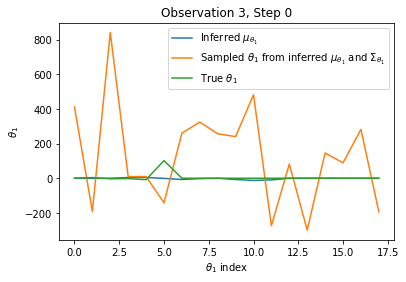

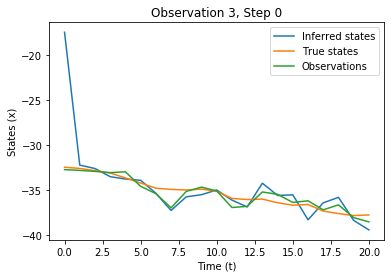

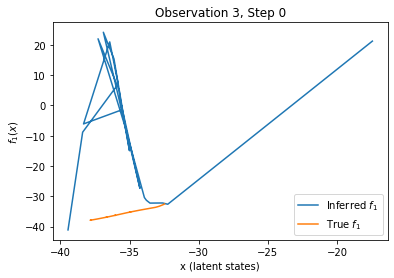

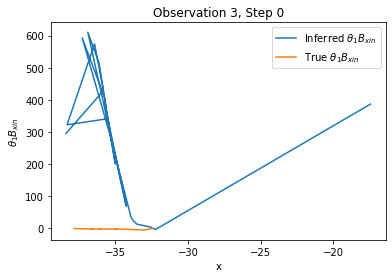

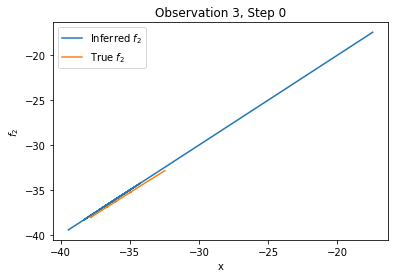

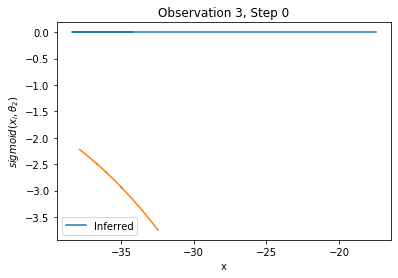

[2.933421746454006, 1.69242888017176]
Step 0
Meas Var:1
Proc Var:1231887.5229006447
POE Var:1944154.1396285659
Observation 3 Complete


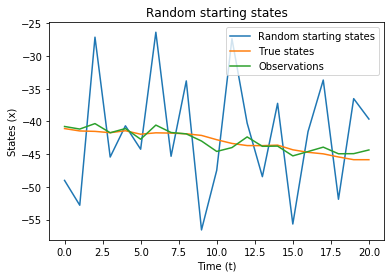

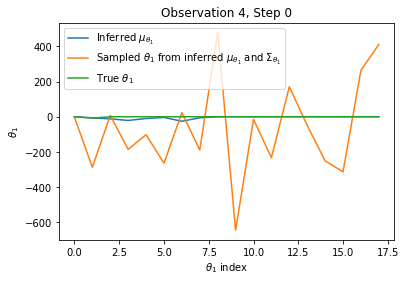

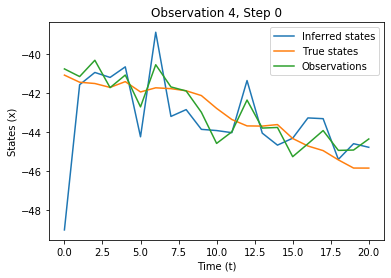

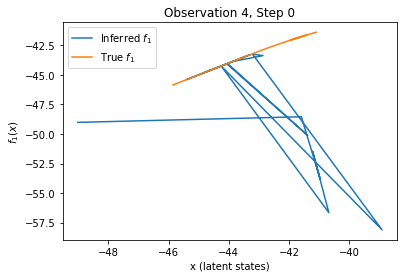

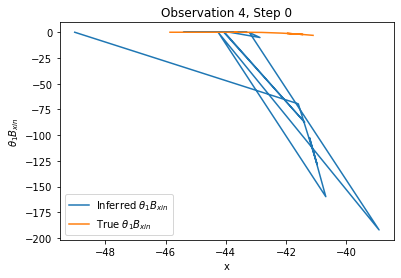

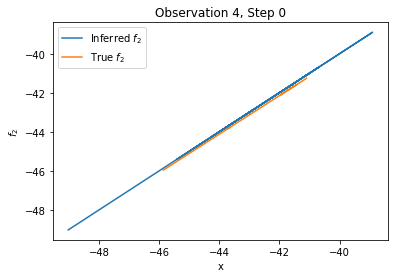

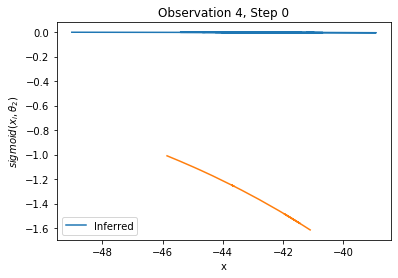

[-4.757506046291829, 0.17745700388513985]
Step 0
Meas Var:1
Proc Var:1242597.5234278406
POE Var:2360041.9612717377
Observation 4 Complete


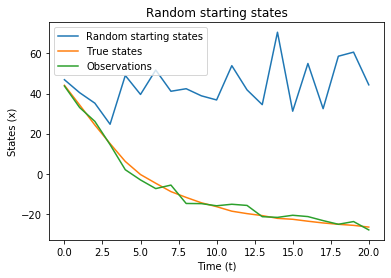

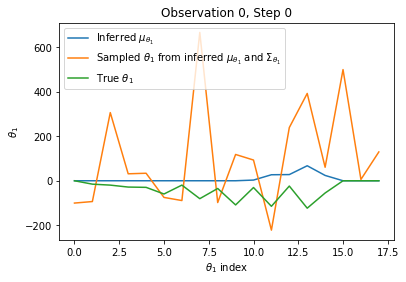

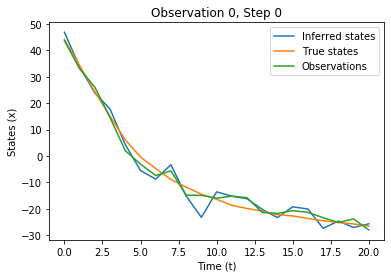

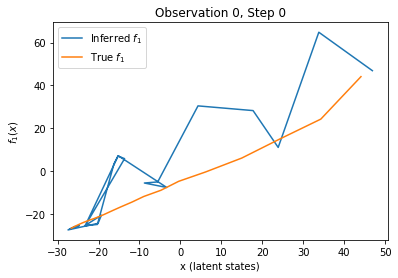

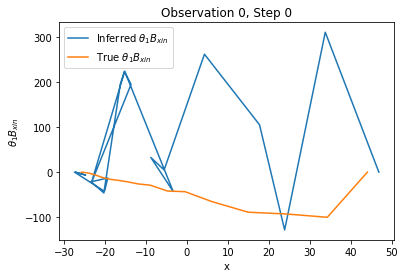

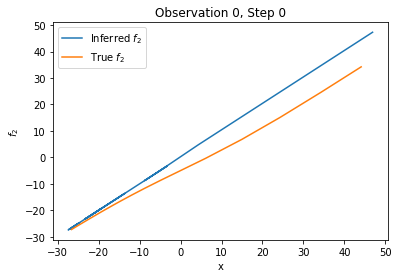

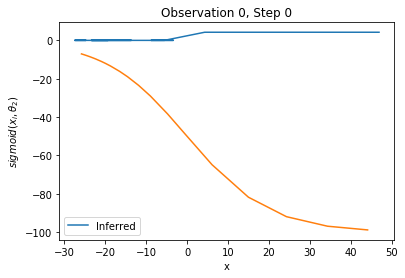

[4.235177648463514, 3.118535398698823]
Step 0
Meas Var:10
Proc Var:605540.2995917455
POE Var:1890929.0606349166
Observation 0 Complete


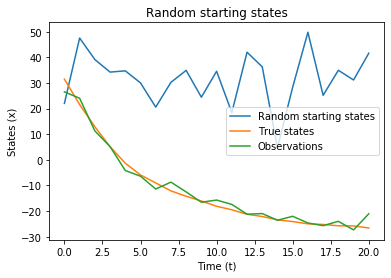

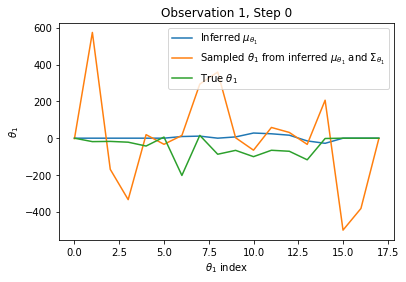

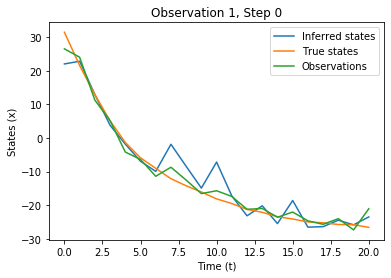

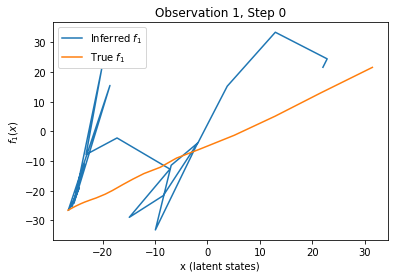

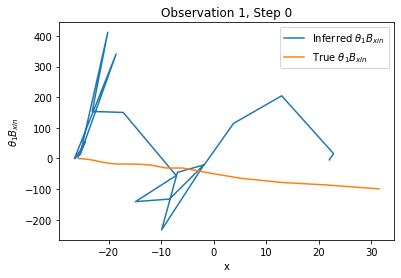

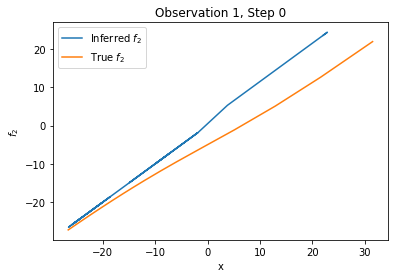

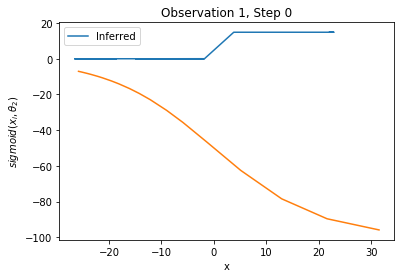

[14.850783554681623, 4.078913384561478]
Step 0
Meas Var:10
Proc Var:1136797.8103536582
POE Var:1832739.9354372842
Observation 1 Complete


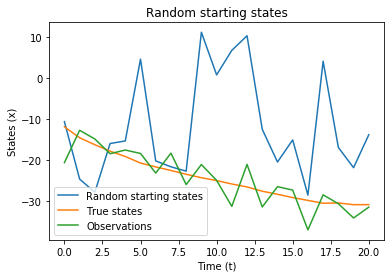

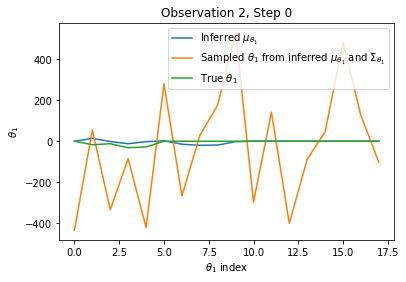

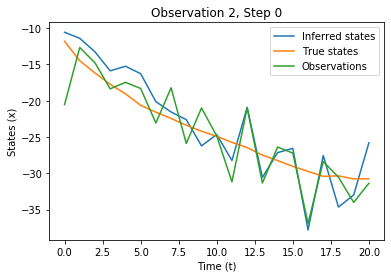

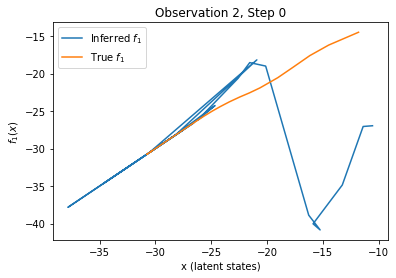

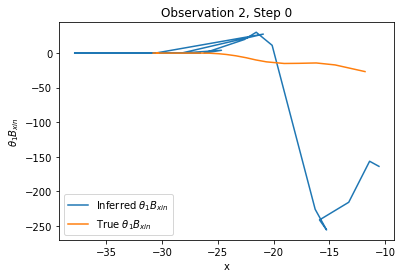

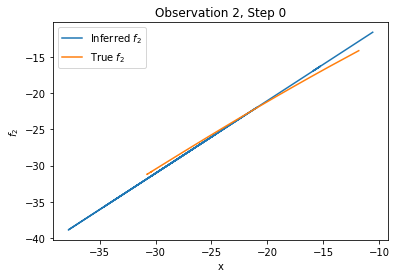

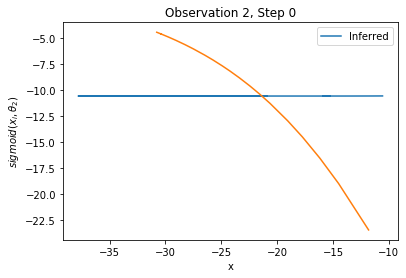

[-10.560923138837431, -0.6648623521121094]
Step 0
Meas Var:10
Proc Var:1122460.2821097479
POE Var:4114371.247332325
Observation 2 Complete


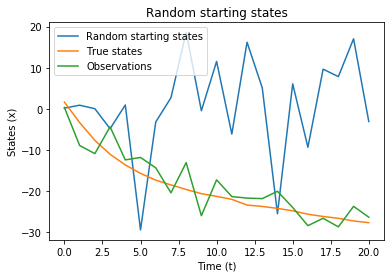

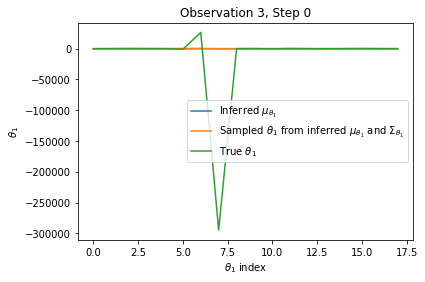

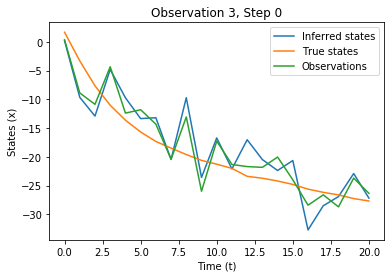

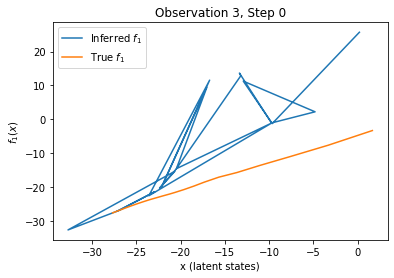

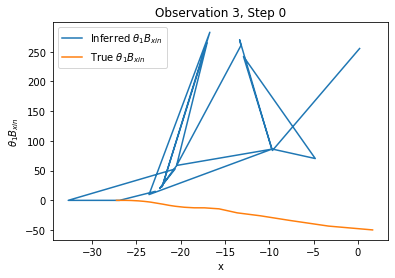

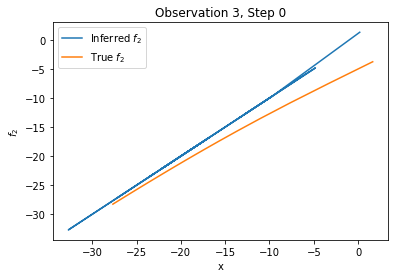

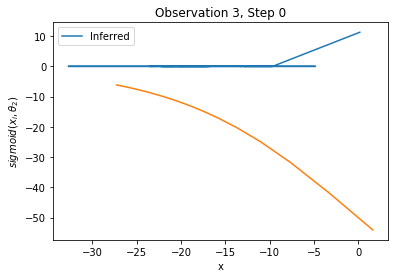

[17.65828320028075, 3.142514916290748]
Step 0
Meas Var:10
Proc Var:798226.8651034718
POE Var:2960688.3966945577


In [ ]:
mnoise = [1,10,100]
di = []
avec=[]
bvec = []

for k in range(3):
    meas_var = mnoise[k]
    spl = SplineLearnerPOE(ta,tb,meas_var,proc_var,theta_var,a_var,b_var,
                       poe_var,nsamps,nptspersamp,dt)
    spl.plot_iter = 100
    spl.run(gibbs_steps=100, plot = True) 
    
    a = [f[-10:] for f in spl.trace_a]
    b = [f[-10:] for f in spl.trace_a]
    
    avec.append(spl.trace_a)
    bvec.append(spl.trace_b)
    
    f1 = [f[-10:] for f in spl.trace_f1]
    f2 = [f[-10:] for f in spl.trace_f2]

    diff = np.array([[np.mean(np.abs(f1[i][j]-f2[i][j])) for i in range(len(f1))] for j in range(len(f1[0]))])
    di.append(np.mean(diff,0))



In [39]:
dat = np.array(di)
means = np.mean(dat,1)
stds = np.std(dat,1)
plt.errorbar([0,1,2],means,yerr = stds,label = 'Average',linewidth = 3)
for i in range(dat.shape[1]):
    plt.plot(dat[:,i],linewidth = .5)
    plt.xticks([0,1,2],['Low Noise','Medium Noise','High Noise'])
    plt.ylabel(r'Average distance between $f_{1}$ and $f_{2}$')
plt.legend()

IndexError: tuple index out of range

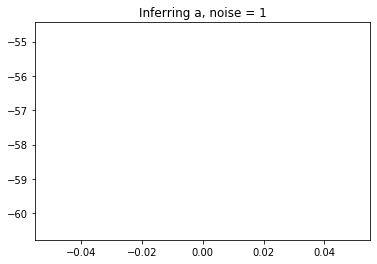

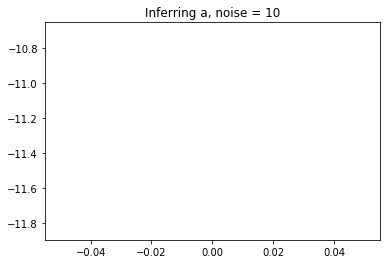

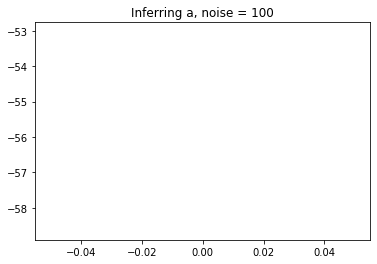

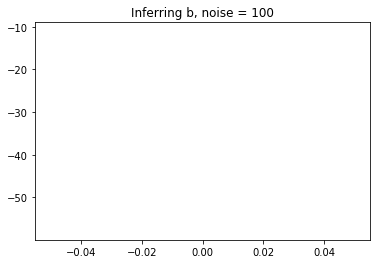

In [41]:
for i in range(len(mnoise)):
    plt.title('Inferring a, noise = ' + str(mnoise[i]))
    plt.plot(np.mean(np.array(a[i]),0))
    plt.show()
    
for i in range(len(mnoise)):
    plt.title('Inferring b, noise = ' + str(mnoise[i]))
    plt.plot(np.mean(np.array(b[i]),0))
    plt.show()

Text(0.5, 1.0, 'Sigmoid with a = -100, b = 0.1')

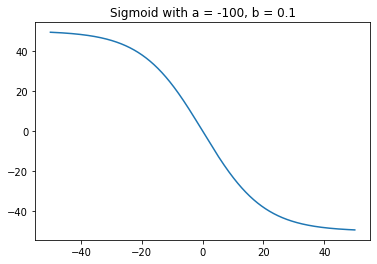

In [4]:
plt.plot(spl.time,spl.f)
plt.title('Sigmoid with a = -100, b = 0.1')

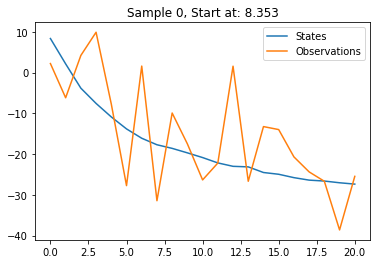

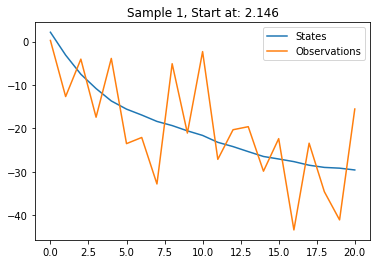

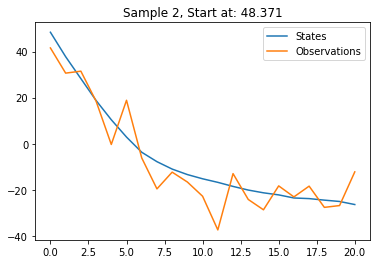

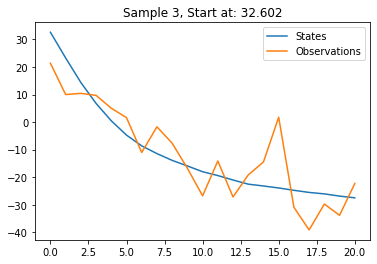

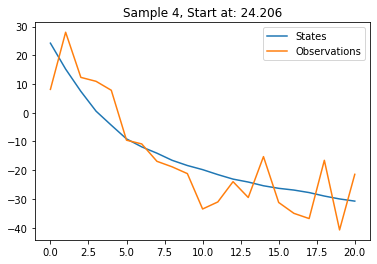

In [11]:
for i,states in enumerate(spl.states):
    plt.plot(range(len(states)),states,label = 'States')
    plt.plot(range(len(states)),spl.observations[i], label = 'Observations')
    plt.title('Sample ' + str(i) + ', Start at: ' + str(np.round(states[0],3)))
    plt.legend()
    plt.show()

In [5]:
for i in range(len(spl.states)):
    print(np.var(spl.states[i])/np.var(spl.observations[i]))

0.9321094548263029
0.9399883969513994
0.8354422822897513
0.901476457777803
0.9643890521449006


In [6]:
# for i in range(len(spl.states)):
#     plt.plot(spl.ys[i],label = 'ys')
#     plt.plot(spl.true_bmat1[i]@spl.true_betas[i],label = 'bmat@betas')
#     plt.legend()
#     plt.show()

In [7]:
# to do: add graphs to latex
# replot old figures (function vs time)


In [8]:
# for i in range(len(spl.states)):
#     x0 = spl.states[i][0]
#     x = np.random.normal(x0, 10, size=spl.states[0].shape[0])

#     plt.figure()
#     plt.title('Random starting states')
#     plt.plot(x,label = 'Random starting states')
#     plt.plot(spl.states[i], label='True states')
#     plt.plot(spl.observations[i],label = 'Observations')
#     plt.xlabel('Time (t)')
#     plt.ylabel('States (x)')
#     plt.legend()
#     plt.show()

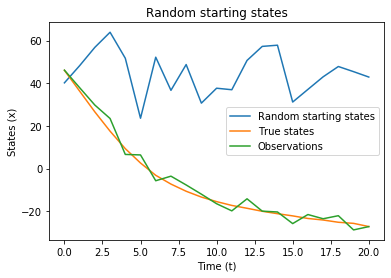

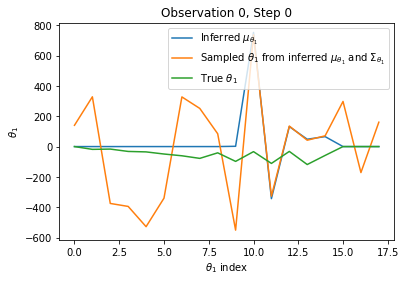

/Users/jendawk/Documents/GeorgTravisRot/POE_learner/spline_learner_poe.py:101: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(num - dem)


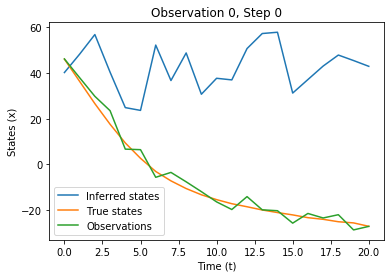

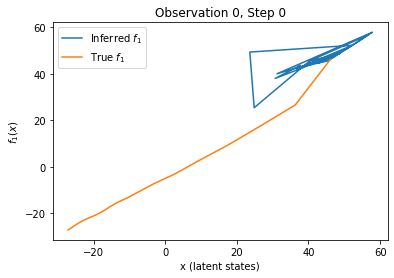

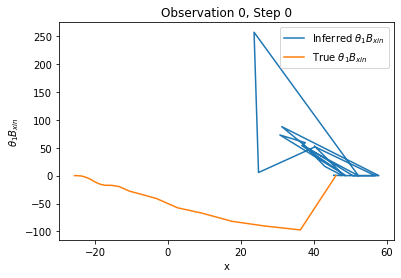

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [9]:
gibbs_steps = 500
spl.poe_var = np.eye(spl.states[0].shape[0])
spl.pvar = 10
spl.mvar = 1
spl.gibbs_var = 5
spl.run(gibbs_steps, train_var = False) 

In [ ]:
# Proving that theta update works

In [10]:
def update_theta(states, f2):
    bmat = spl.calc_bmat(states)
    bmat2 = spl.calc_bmat(states[:-1])
    sig_theta = np.linalg.inv(np.eye(bmat.shape[1])*(1/spl.theta_var) + (spl.dt)*(bmat2.T@(
        (1/(spl.pvar*spl.dt))*np.eye(bmat2.shape[0]))@bmat2) + (spl.dt**2)*bmat.T@np.linalg.inv(spl.poe_var)@bmat)
    mu_theta = sig_theta@(spl.mu_betas@np.eye(bmat.shape[1])*(1/spl.theta_var) + ((states[1:] - states[:-1]))@(
        np.eye(bmat2.shape[0])*(1/(spl.pvar*spl.dt)))@bmat2 + (spl.dt**2)*(bmat.T@np.linalg.inv(spl.poe_var)@f2))
    part1 =  spl.mu_betas@np.eye(bmat.shape[1])*(1/spl.theta_var) + ((states[1:] - states[:-1]))@(
        np.eye(bmat2.shape[0])*(1/(spl.pvar*spl.dt)))@bmat2
    part1a = spl.mu_betas@np.eye(bmat.shape[1])*(1/spl.theta_var)
    part1b = ((states[1:] - states[:-1]))@(np.eye(bmat2.shape[0])*(1/(spl.pvar*spl.dt)))@bmat2
#     import pdb; pdb.set_trace()
    return mu_theta, sig_theta, part1,part1a,part1b

In [11]:
def update_theta_2(states):
    bmat = spl.calc_bmat(states)
    bmat2 = spl.calc_bmat(states[:-1])
    sig_theta = np.linalg.inv(np.eye(bmat.shape[1])*(1/spl.theta_var) + (spl.dt)*(bmat2.T@(
            (1/(spl.pvar*spl.dt))*np.eye(bmat2.shape[0]))@bmat2))
    mu_theta = sig_theta@(spl.mu_betas@np.eye(bmat.shape[1])*(1/spl.theta_var) + ((states[1:] - states[:-1]))@(
            np.eye(bmat2.shape[0])*(1/(spl.dt*spl.pvar)))@bmat2)
    part1 = spl.mu_betas@np.eye(bmat.shape[1])*(1/spl.theta_var) + ((states[1:] - states[:-1]))@(
        np.eye(bmat2.shape[0])*(1/(spl.dt*spl.pvar)))@bmat2
    part1a = spl.mu_betas@np.eye(bmat.shape[1])*(1/spl.theta_var)
    part1b = ((states[1:] - states[:-1]))@(np.eye(bmat2.shape[0])*(1/(spl.dt*spl.pvar)))@bmat2
#     import pdb; pdb.set_trace()
    return mu_theta, sig_theta,part1,part1a,part1b

In [12]:
bmat2 =  spl.calc_bmat(spl.states[0][:-1])

In [13]:
# Calculate update with true states
m,s,p1a,pa,pb = update_theta_2(spl.states[0])

In [14]:
# Calculate update with true states, original eqn, and high poe variance
spl.poe_var = (1e7)*np.eye(spl.states[0].shape[0])
f2 = sigmoid(spl.states[0],np.random.randn()*100,np.random.randn()*100)
m3,s3 = spl.update_theta(spl.states[0],f2)

/Users/jendawk/Documents/GeorgTravisRot/helper.py:3: RuntimeWarning: overflow encountered in exp
  y = yscale/(1+np.exp(-xscale*(t)))


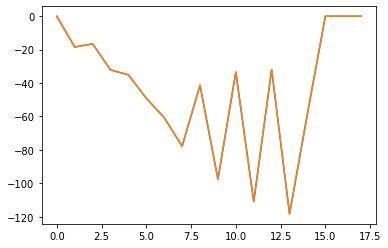

In [16]:
plt.plot(m3)
plt.plot(m)

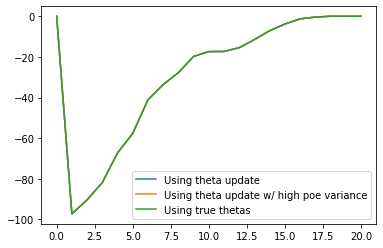

In [15]:
# Update with true states vs 
plt.plot(m@spl.calc_bmat(spl.states[0]).T,label = 'Using theta update')
plt.plot(m3@spl.calc_bmat(spl.states[0]).T,label = 'Using theta update w/ high poe variance')
# plt.plot(p1@spl.calc_bmat(spl.states[0]).T,label = 'Using part 1')
plt.plot(spl.true_betas[0]@spl.calc_bmat(spl.states[0]).T, label = 'Using true thetas')
plt.legend()

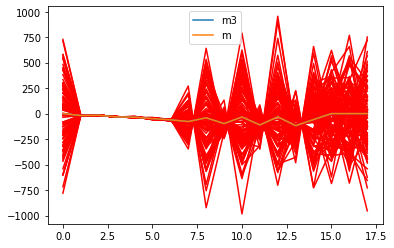

In [35]:
b = st.multivariate_normal(m3,s3).rvs(100)
plt.plot(range(b.shape[1]),b.T,c='r')
plt.plot(m3,label = 'm3')
plt.plot(m, label = 'm')
plt.legend()

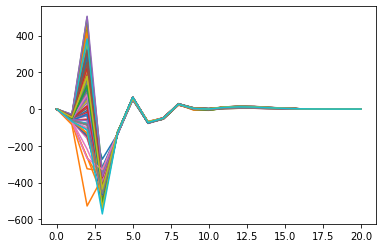

In [59]:
for i in range(b.shape[0]):
    plt.plot(b[i,:]@spl.true_bmat2[0].T)

In [62]:
inf_x = spl.trace_x[0][-1]
f1 = [inf_x + spl.dt*(b[i,:]@spl.calc_bmat(inf_x).T) for i in range(b.shape[0])]

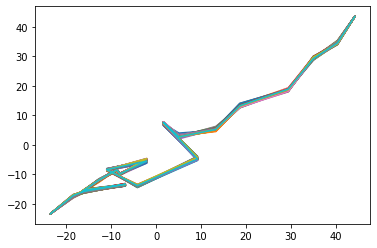

In [63]:
for i in range(b.shape[0]):
    plt.plot(inf_x, f1[i])

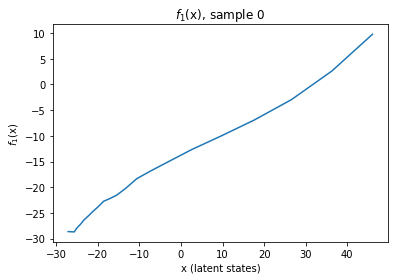

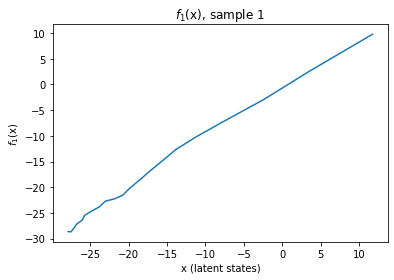

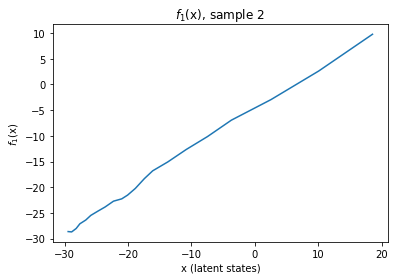

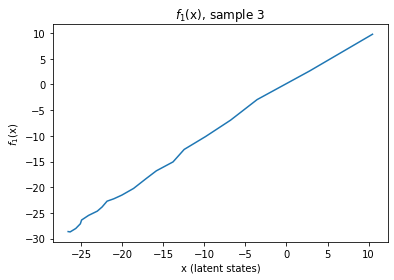

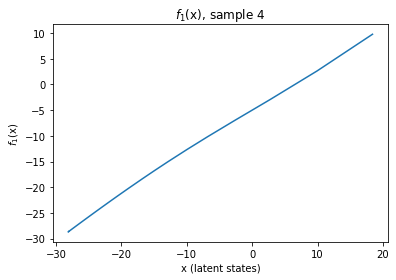

In [84]:
for i in range(len(spl.states)):
    x = spl.states[i]
    f1 = [x + spl.dt*(m@spl.calc_bmat(x).T) for i in range(b.shape[0])]
    plt.plot(spl.states[i],f2)
    plt.xlabel('x (latent states)')
    plt.ylabel(r'$f_{1}$(x)')
    plt.title(r'$f_{1}$(x), sample ' + str(i))
    plt.show()

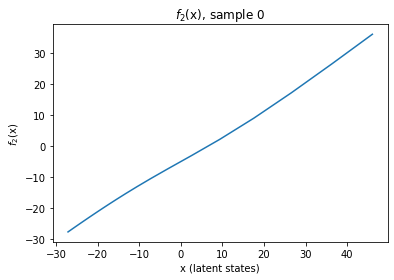

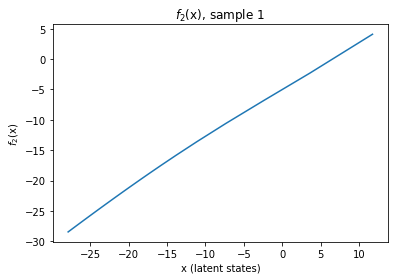

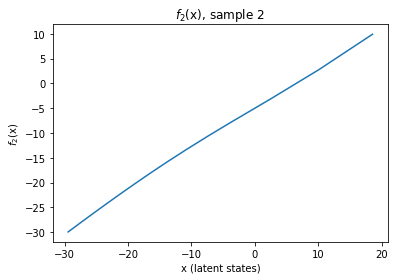

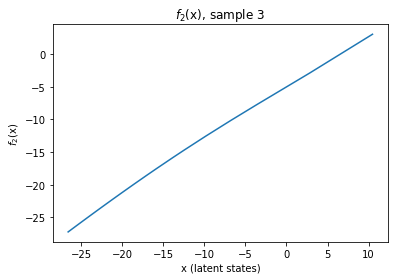

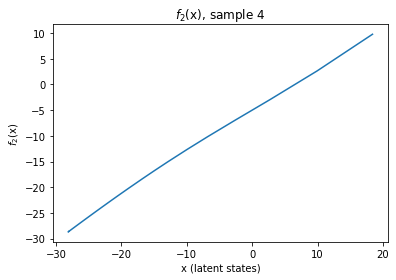

In [76]:
for i in range(len(spl.states)):
    f2 = spl.states[i] + spl.dt*sigmoid(spl.states[i],spl.true_a,spl.true_b)
    plt.plot(spl.states[i],f2)
    plt.xlabel('x (latent states)')
    plt.ylabel(r'$f_{2}$(x)')
    plt.title(r'$f_{2}$(x), sample ' + str(i))
    plt.show()

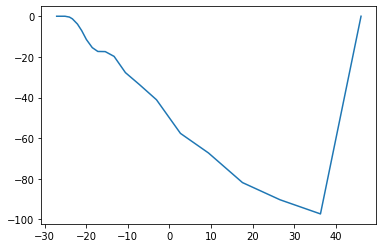

In [65]:
plt.plot(spl.states[0],m@spl.true_bmat2[0].T)

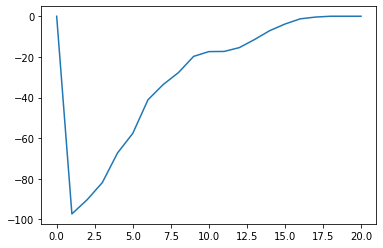

In [61]:
plt.plot(m@spl.true_bmat2[0].T)

In [8]:
for i,tr in enumerate(spl.trace_x):
    plt.figure()
    for tr2 in tr[-100:-1]:
        plt.plot(np.arange(len(tr2)),tr2,c='green')

    plt.plot(np.arange(len(tr[-1])),tr[-1],label = 'Inferred x',c='green')
    plt.plot(np.arange(len(spl.observations[i])),spl.observations[i],marker = '.',label = 'observed y')


    plt.plot(np.arange(len(spl.states[i])),spl.states[i],marker='*',label = 'True x')
    plt.legend()
    plt.xlabel('Iteration')
    plt.show()

In [9]:
for i,a in enumerate(spl.trace_a):
    b = spl.trace_b[i]
    plt.plot(range(len(a)),a,label = 'a')
    plt.plot(range(len(a)),b,label = 'b')
    plt.plot(range(len(a)),20*np.ones(len(a)),label = 'True a =20')
    plt.plot(range(len(a)),.1*np.ones(len(a)),label = 'True b = 0.1')
    plt.legend()
    plt.xlabel('Iteration')
    plt.show()

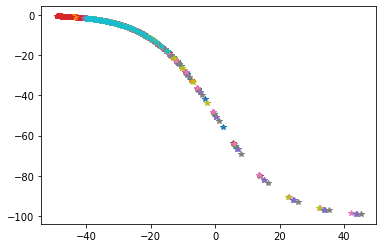

In [24]:
for s in spl.states:
    plt.plot(s,sigmoid(s,spl.true_a,spl.true_b),'*')
plt.show()

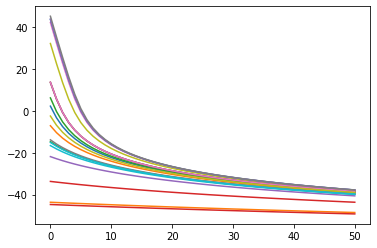

In [25]:
for s in spl.states:
    plt.plot(s)

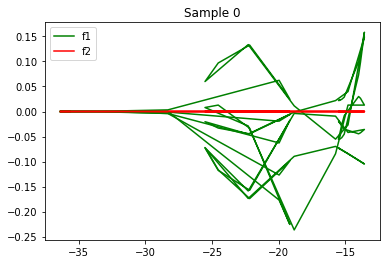

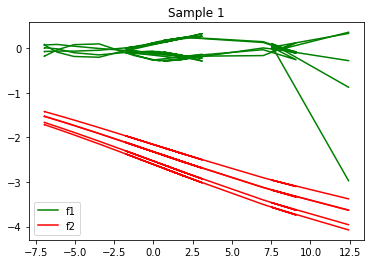

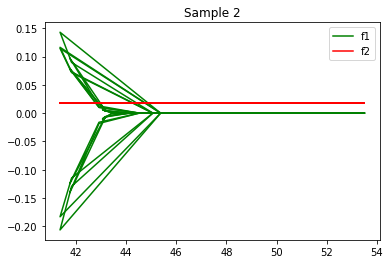

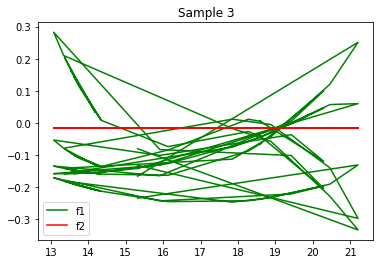

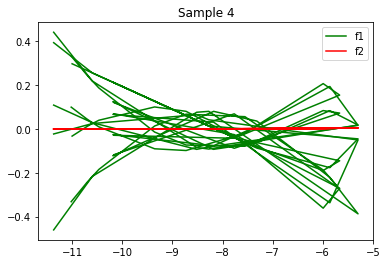

In [10]:
for ss in range(len(spl.trace_f1)):
    for g in range(gibbs_steps - 5, gibbs_steps):
        if g ==(gibbs_steps-1):
            plt.plot(spl.trace_x[ss][g],spl.trace_f1[ss][g],label = 'f1',c='g')
            plt.plot(spl.trace_x[ss][g],spl.trace_f2[ss][g],label = 'f2',c='r')
        else:
            plt.plot(spl.trace_x[ss][g],spl.trace_f1[ss][g],c='g')
            plt.plot(spl.trace_x[ss][g],spl.trace_f2[ss][g],c='r')
        
    plt.legend()
    plt.title('Sample ' + str(ss))
    plt.show()

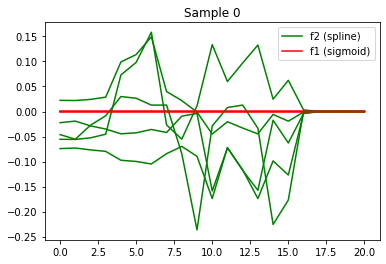

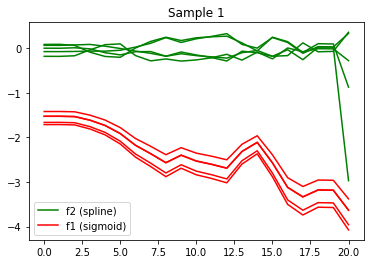

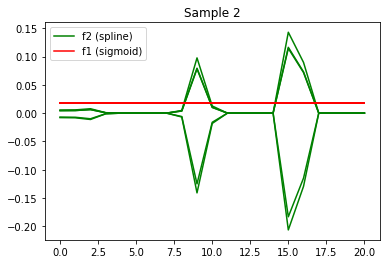

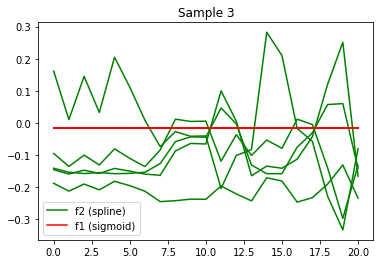

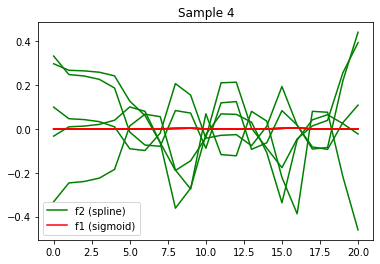

In [11]:
for ss in range(len(spl.trace_f1)):
    for g in range(gibbs_steps - 5, gibbs_steps):
        if g ==(gibbs_steps-1):
            plt.plot(spl.trace_f1[ss][g],label = 'f2 (spline)',c='g')
            plt.plot(spl.trace_f2[ss][g],label = 'f1 (sigmoid)',c='r')
        else:
            plt.plot(spl.trace_f1[ss][g],c='g')
            plt.plot(spl.trace_f2[ss][g],c='r')
        
    plt.legend()
    plt.title('Sample ' + str(ss))
    plt.show()

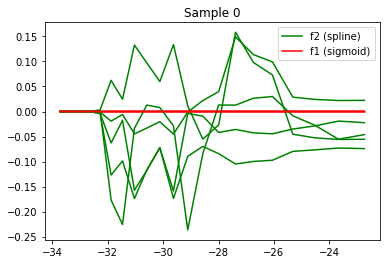

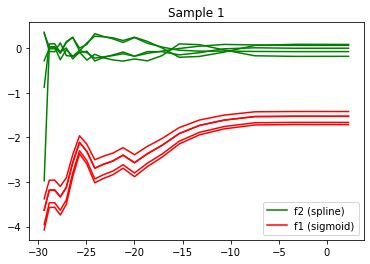

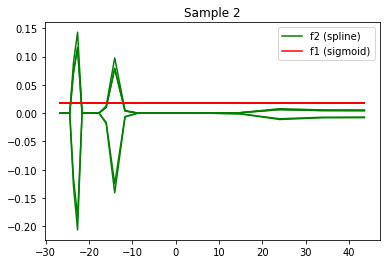

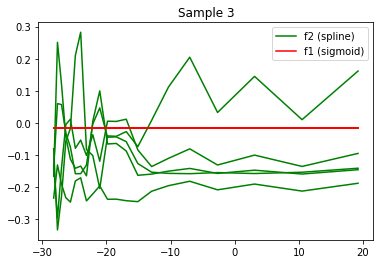

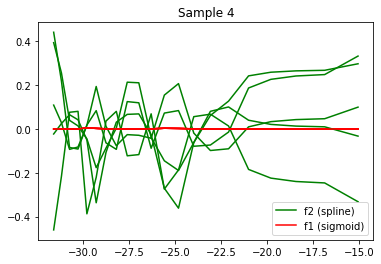

In [12]:
for ss in range(len(spl.trace_f1)):
    for g in range(gibbs_steps - 5, gibbs_steps):
        if g ==(gibbs_steps-1):
            plt.plot(spl.states[ss],spl.trace_f1[ss][g],label = 'f2 (spline)',c='g')
            plt.plot(spl.states[ss],spl.trace_f2[ss][g],label = 'f1 (sigmoid)',c='r')
        else:
            plt.plot(spl.states[ss],spl.trace_f1[ss][g],c='g')
            plt.plot(spl.states[ss],spl.trace_f2[ss][g],c='r')
        
    plt.legend()
    plt.title('Sample ' + str(ss))
    plt.show()

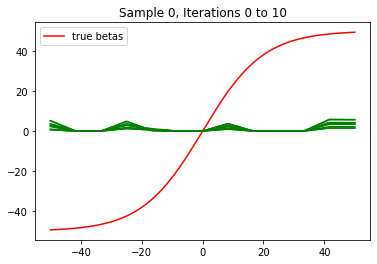

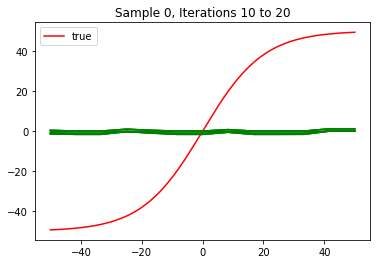

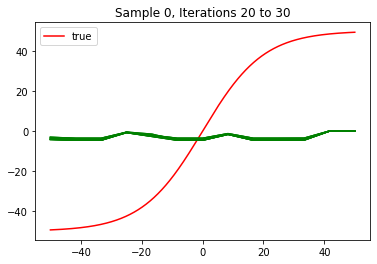

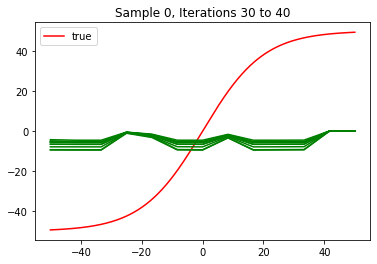

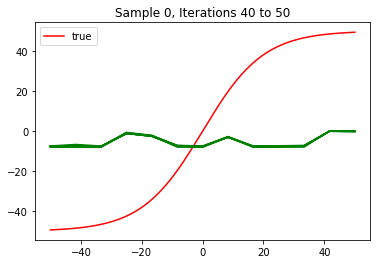

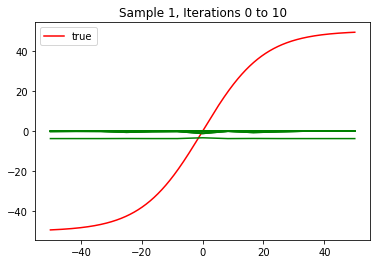

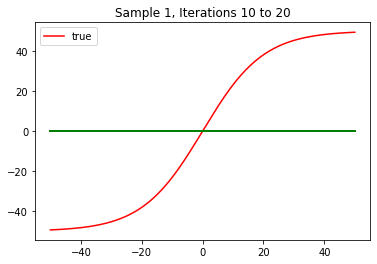

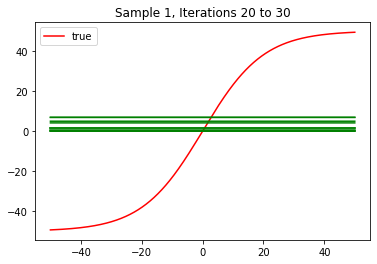

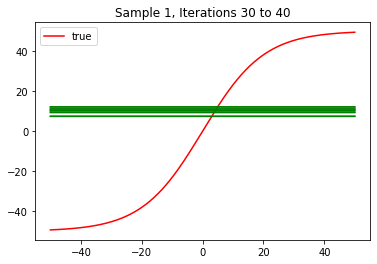

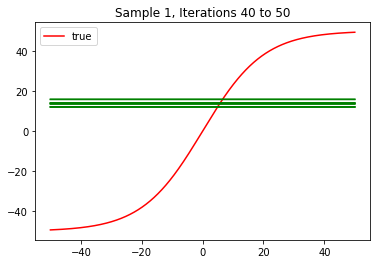

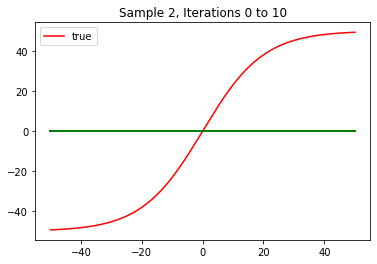

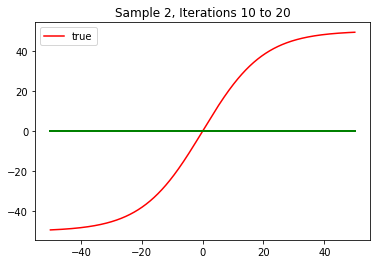

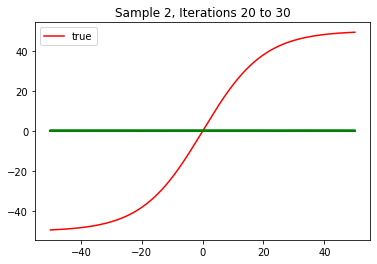

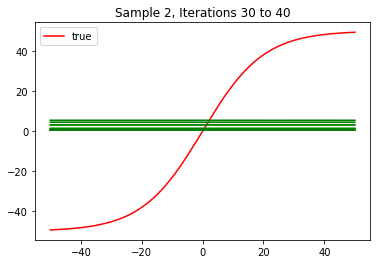

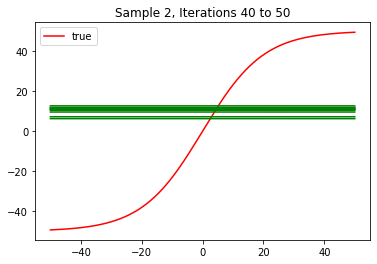

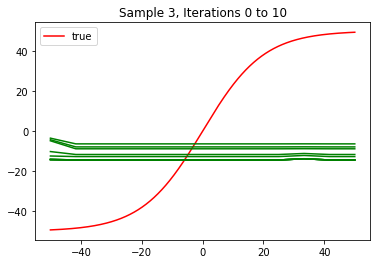

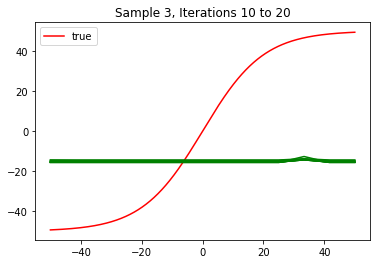

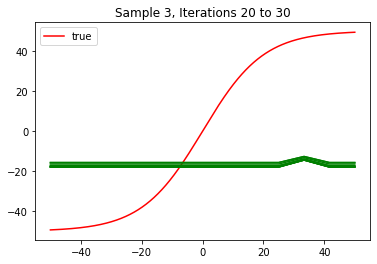

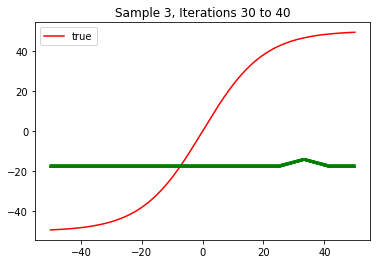

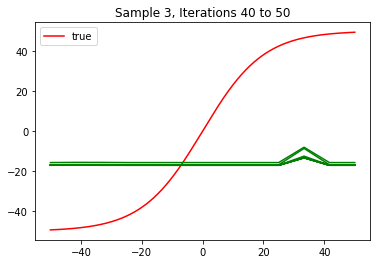

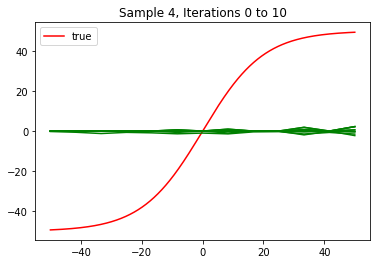

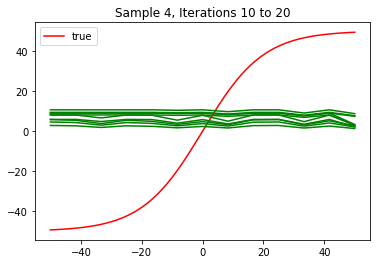

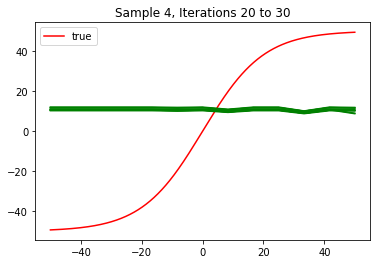

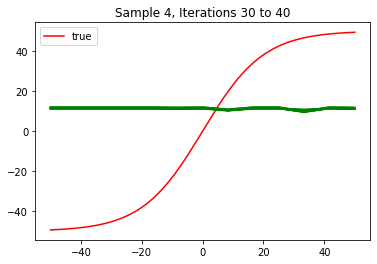

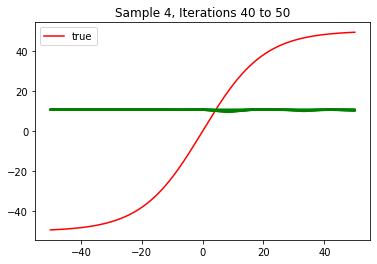

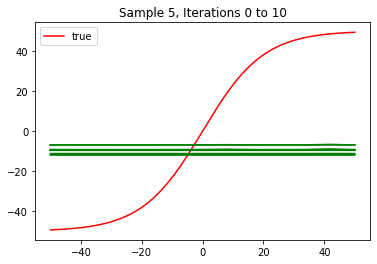

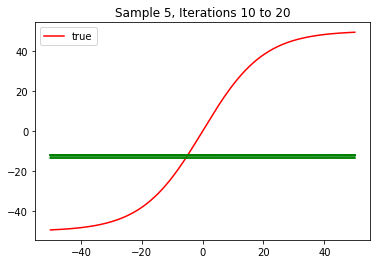

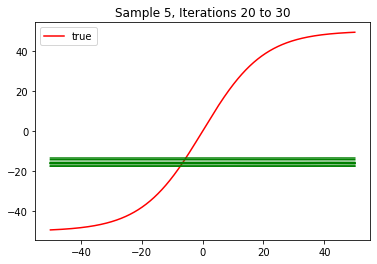

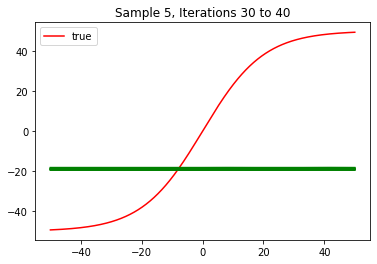

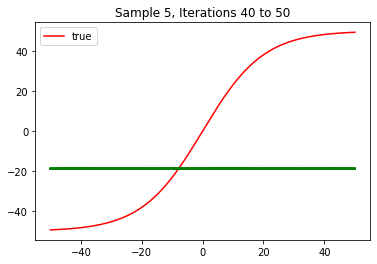

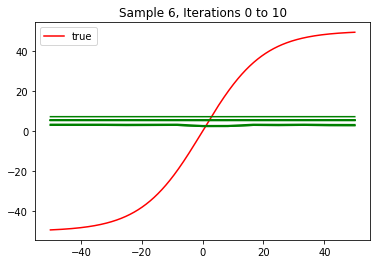

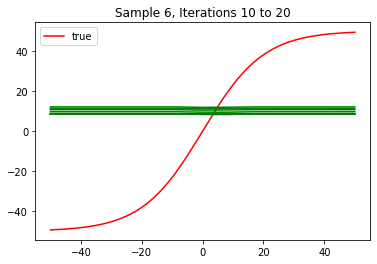

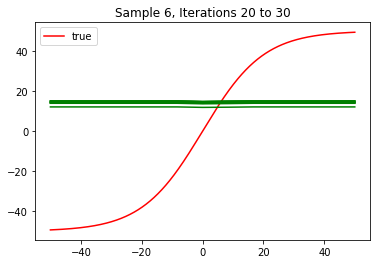

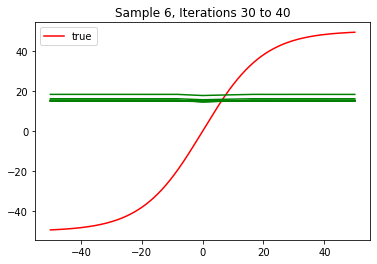

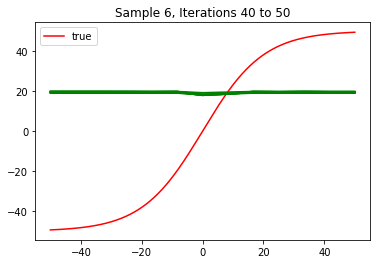

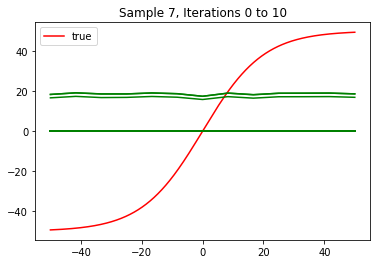

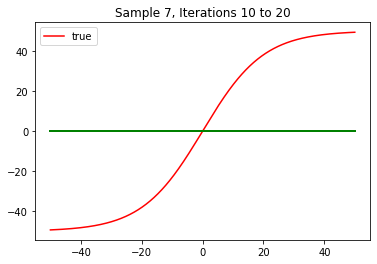

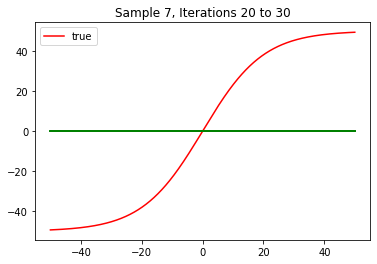

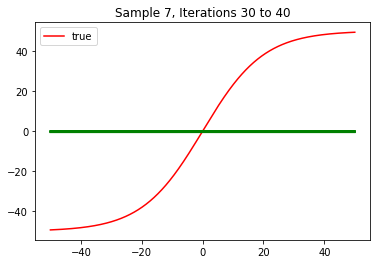

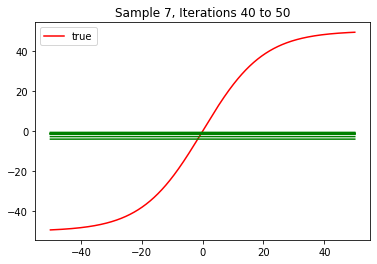

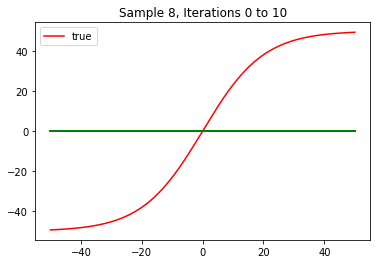

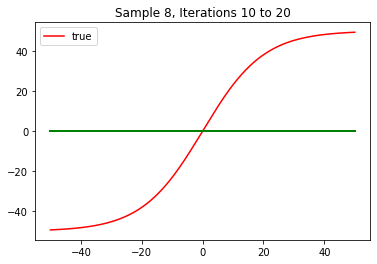

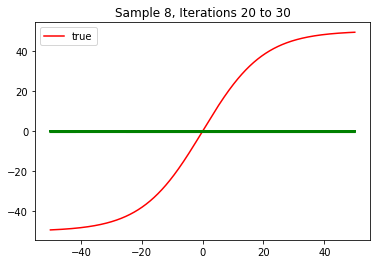

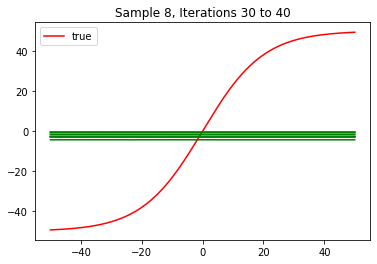

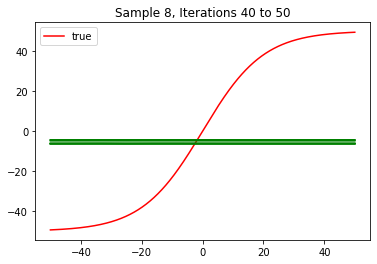

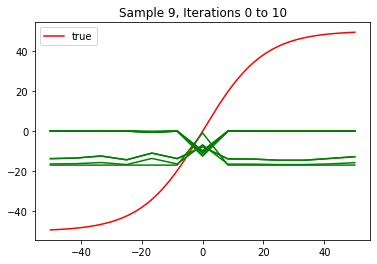

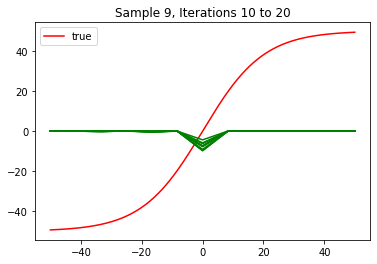

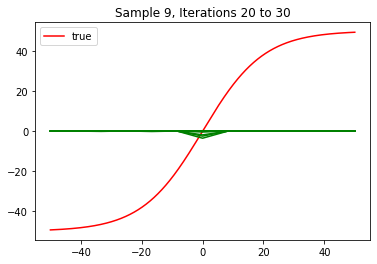

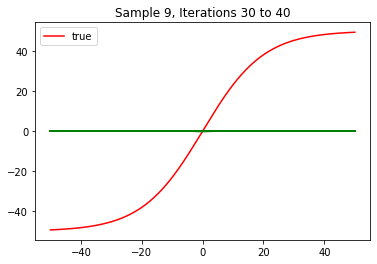

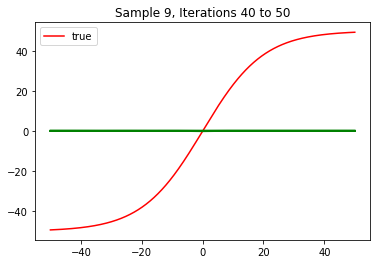

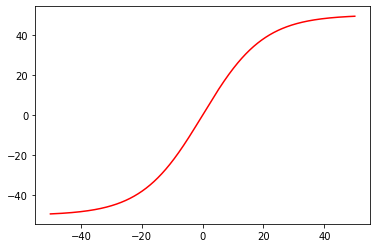

In [33]:
plt.figure()
plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true betas',c='red')
for k,tr in enumerate(trace_theta2_spl): 
    for i in range(50):
        plt.plot(np.linspace(-50,50,len(tr[i][1])), tr[i][1],c='green')
        if (i+1)%10==0:
            plt.title('Sample ' + str(k) + ', Iterations ' + str(i+1-10) + ' to ' + str(i+1))
            plt.legend()
            plt.show()
            plt.figure()
            plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true',c='red')

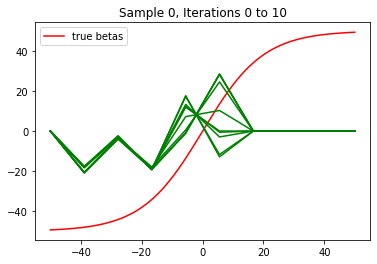

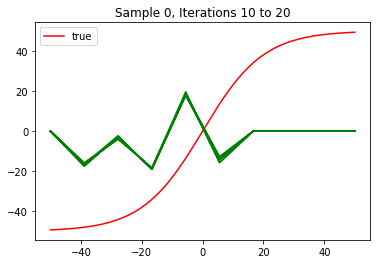

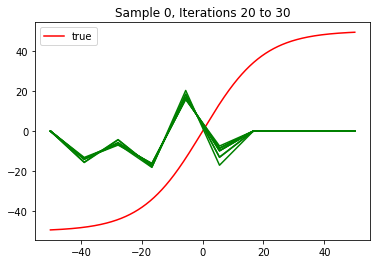

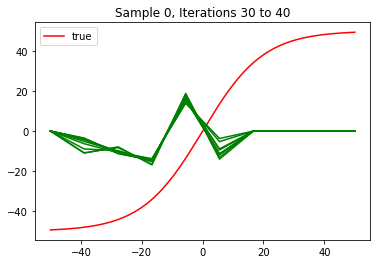

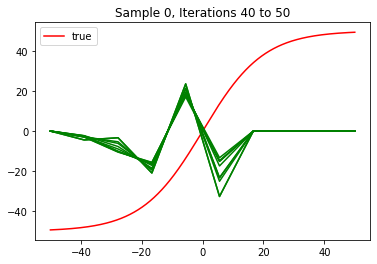

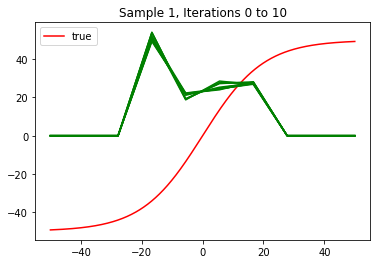

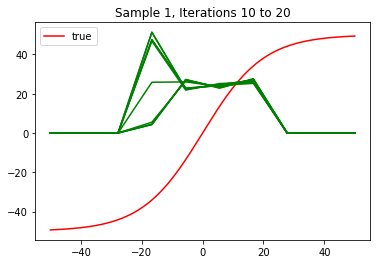

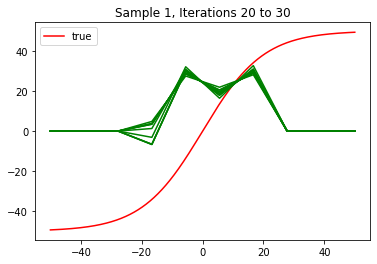

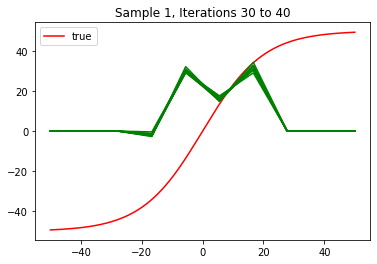

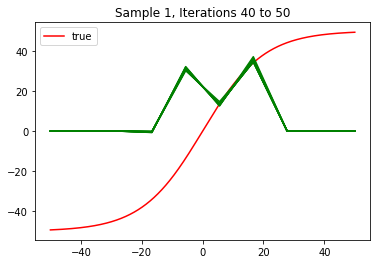

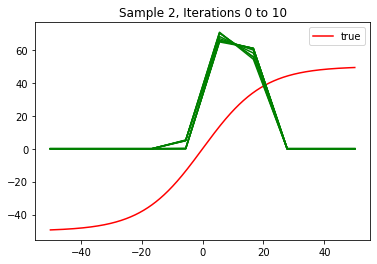

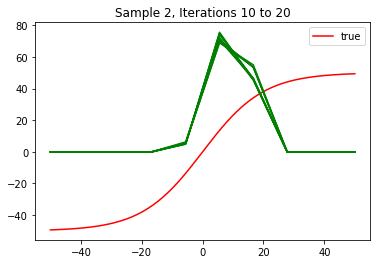

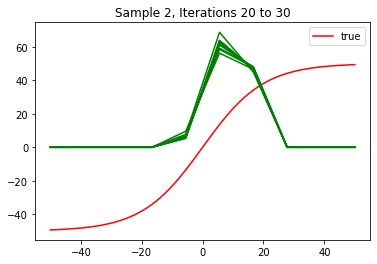

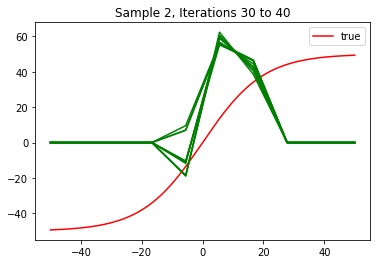

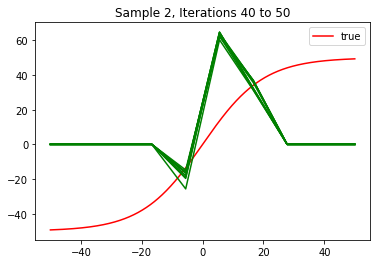

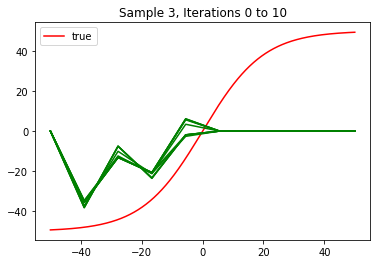

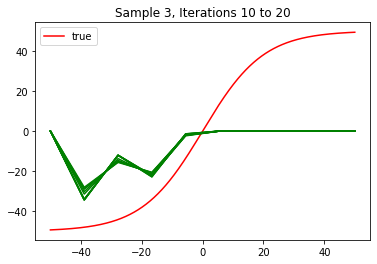

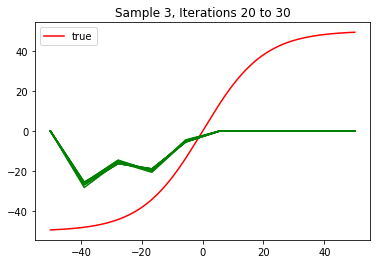

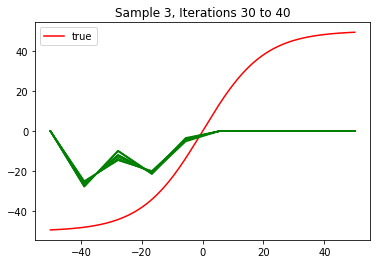

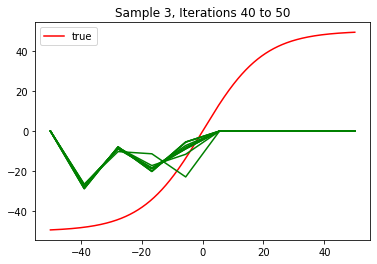

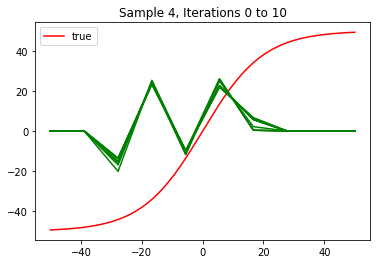

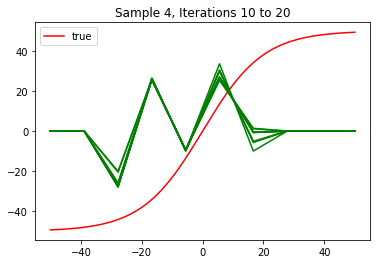

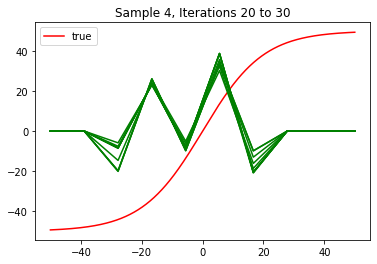

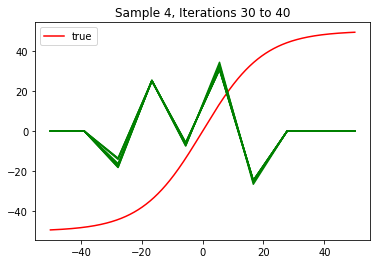

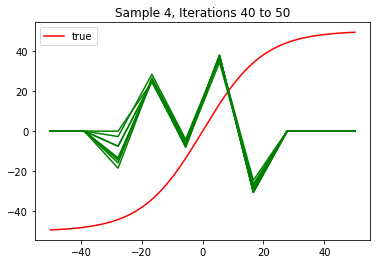

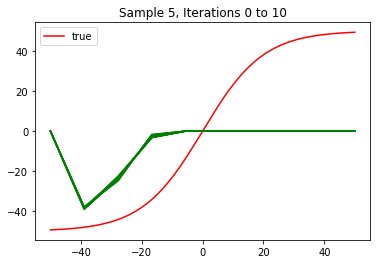

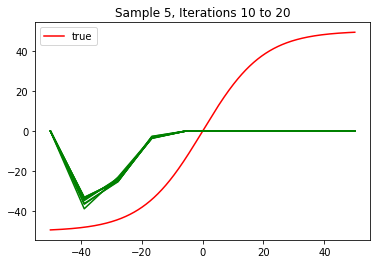

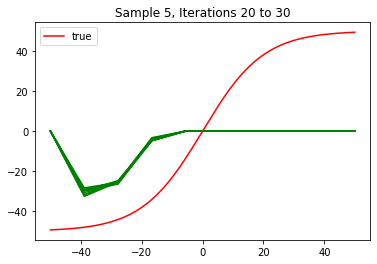

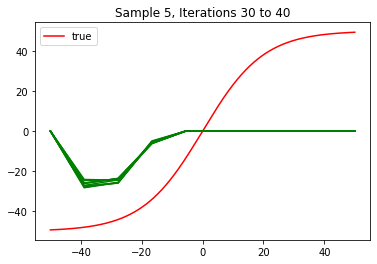

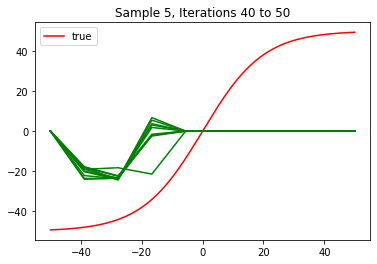

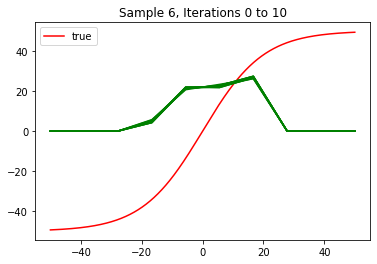

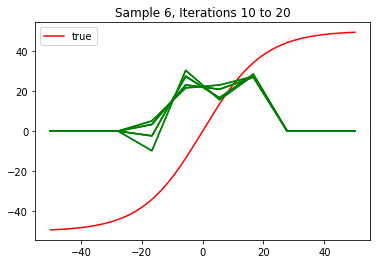

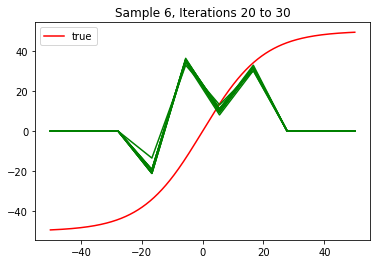

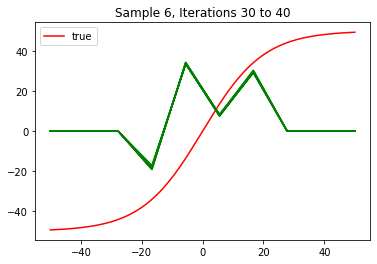

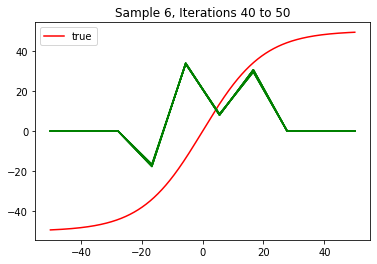

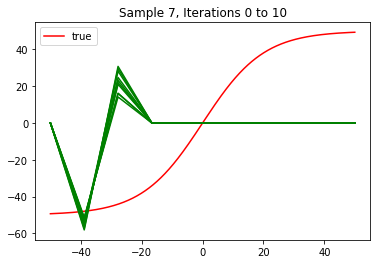

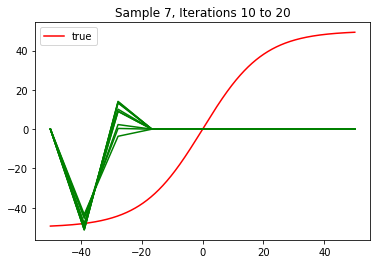

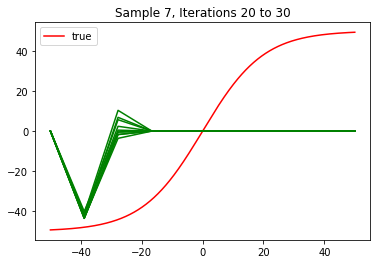

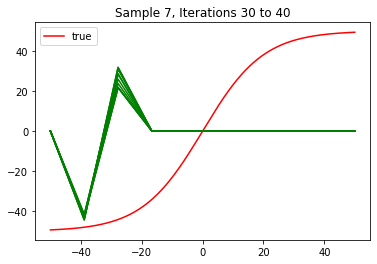

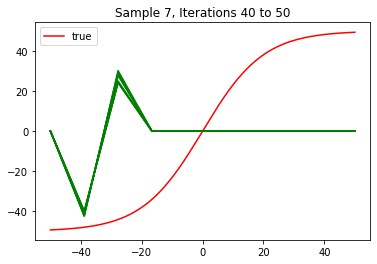

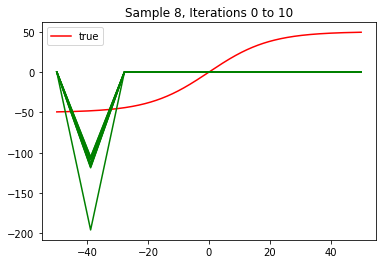

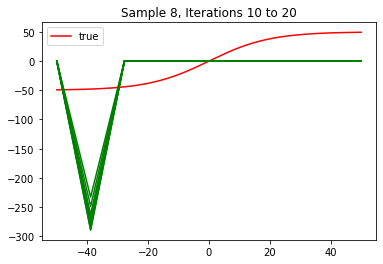

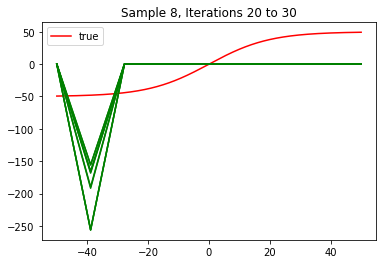

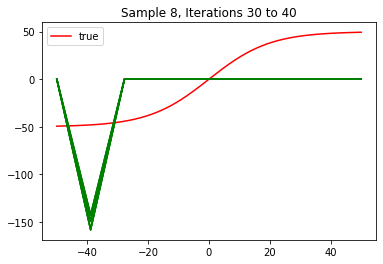

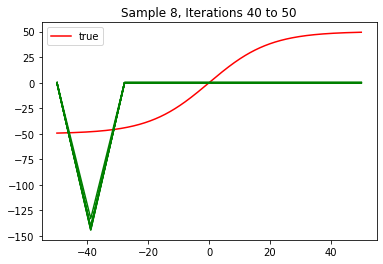

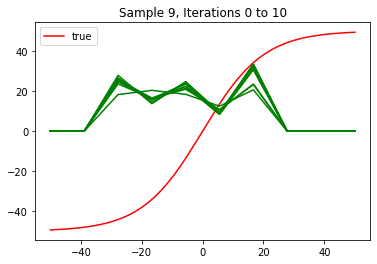

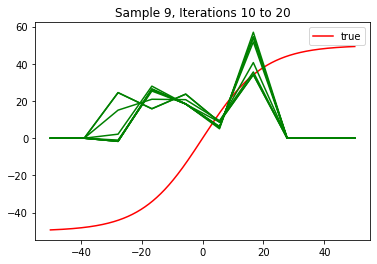

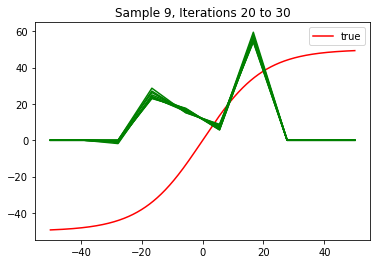

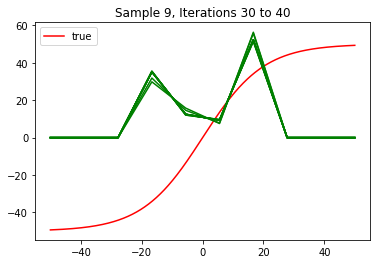

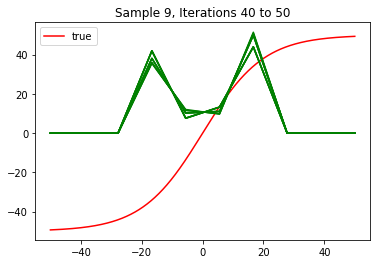

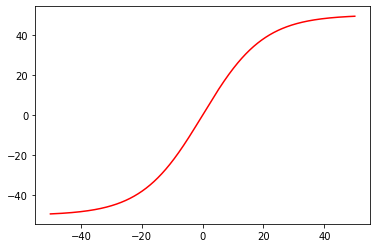

In [10]:

plt.figure()
plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true betas',c='red')
for k,tr in enumerate(trace_theta_spl): 
    for i in range(50):
        plt.plot(np.linspace(-50,50,len(list(zip(*tr))[0][i])), list(zip(*tr))[0][i],c='green')
        if (i+1)%10==0:
            plt.title('Sample ' + str(k) + ', Iterations ' + str(i+1-10) + ' to ' + str(i+1))
            plt.legend()
            plt.show()
            plt.figure()
            plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true',c='red')

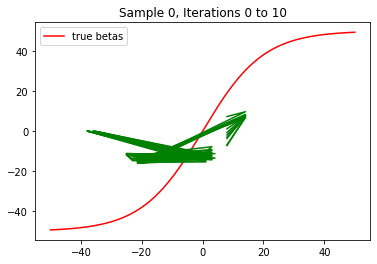

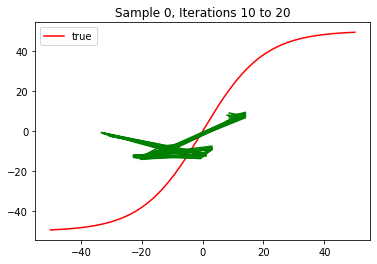

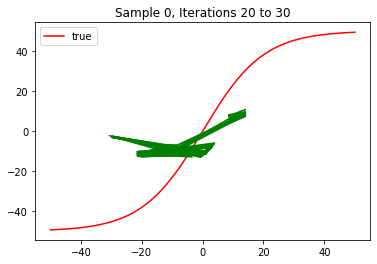

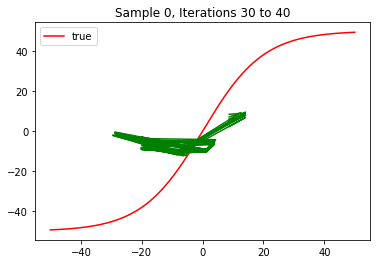

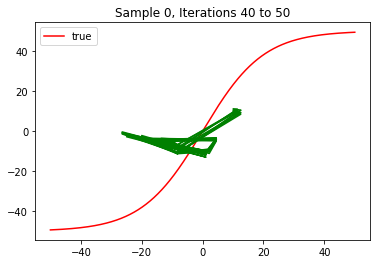

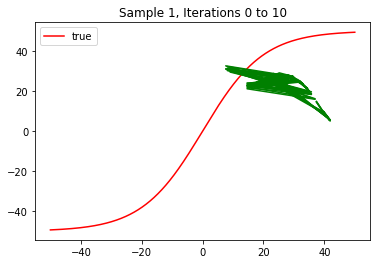

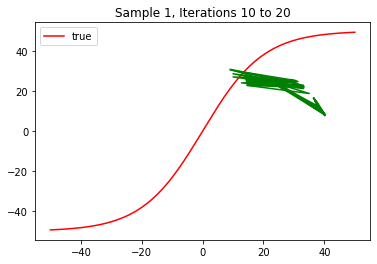

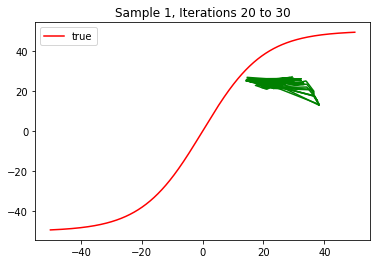

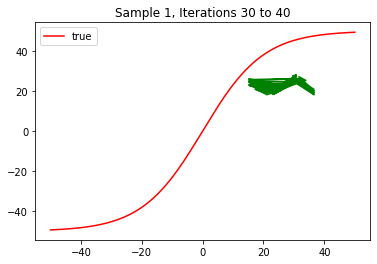

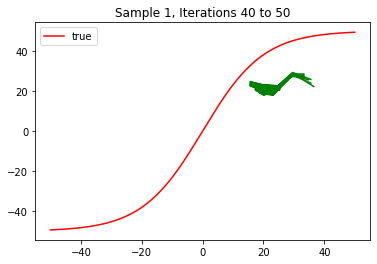

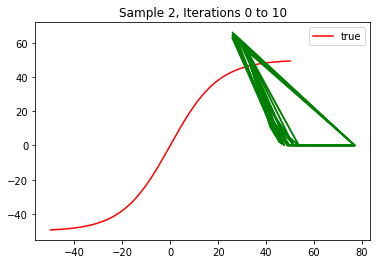

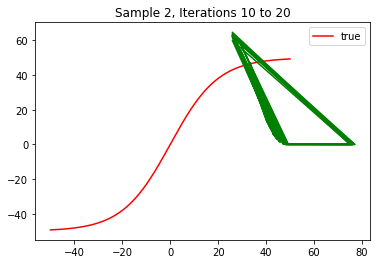

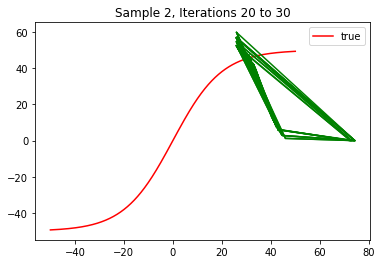

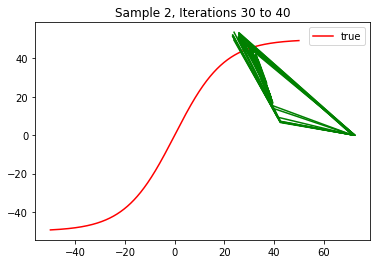

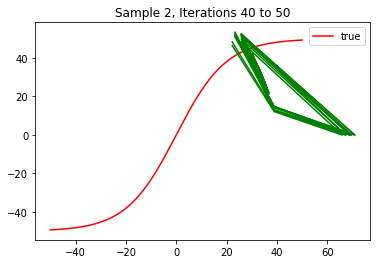

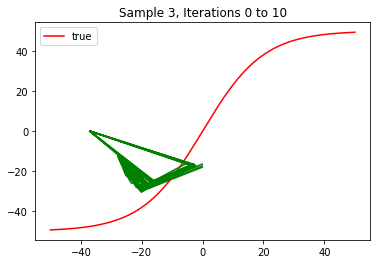

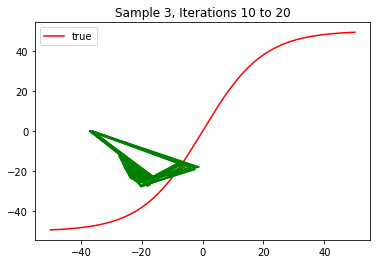

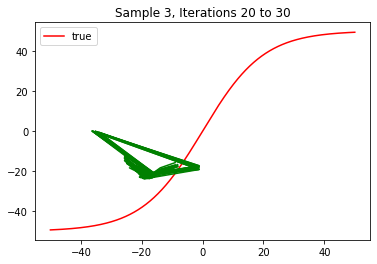

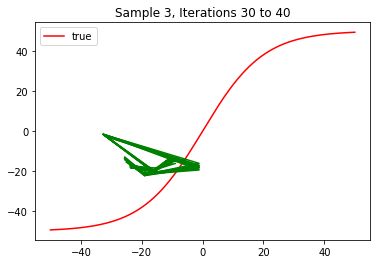

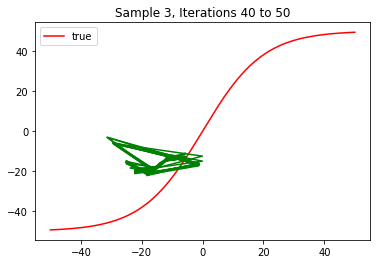

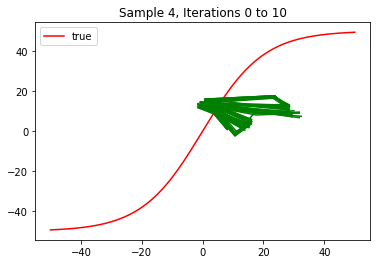

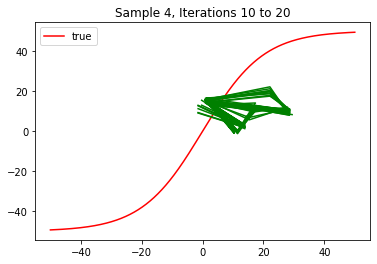

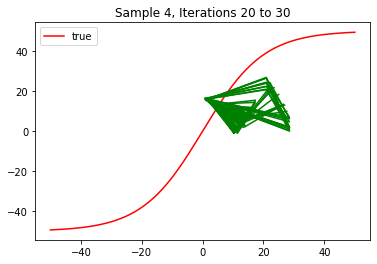

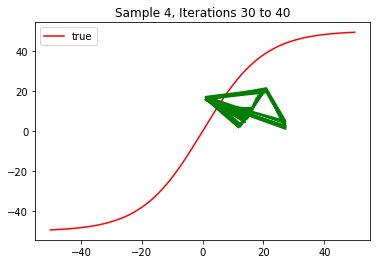

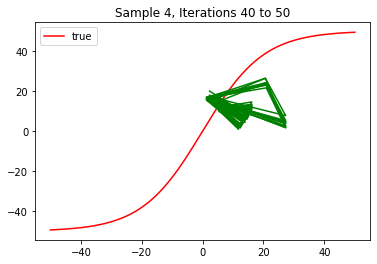

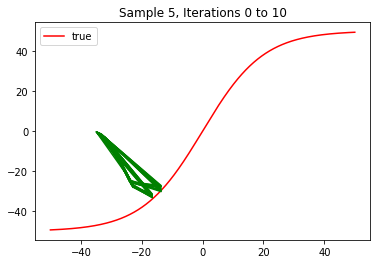

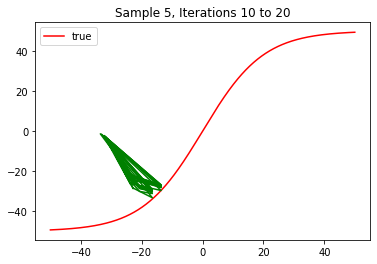

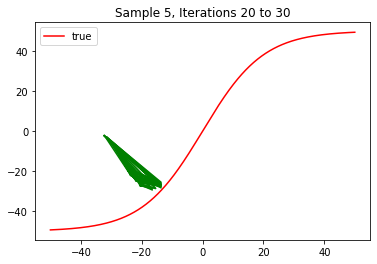

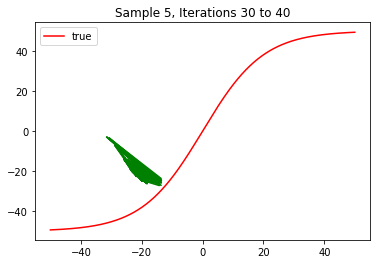

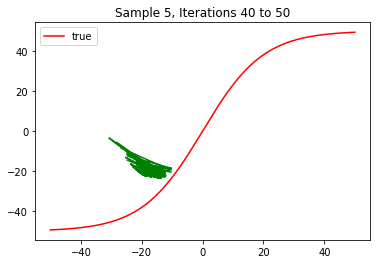

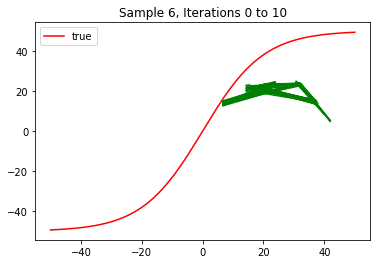

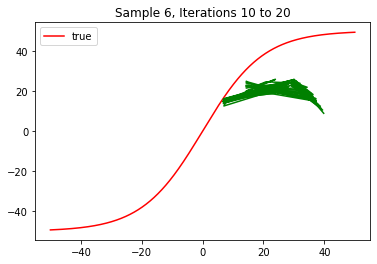

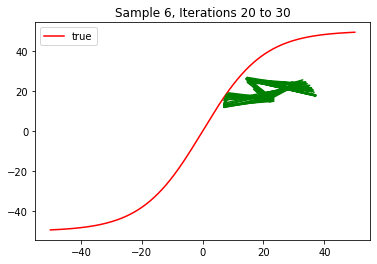

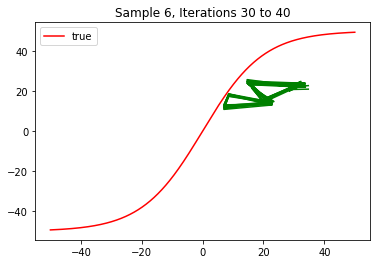

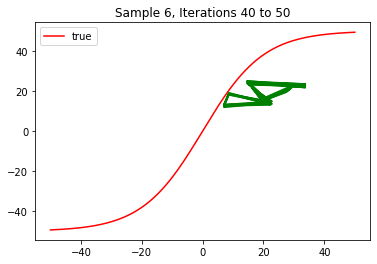

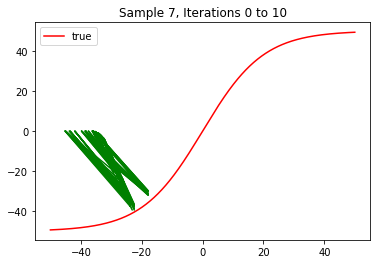

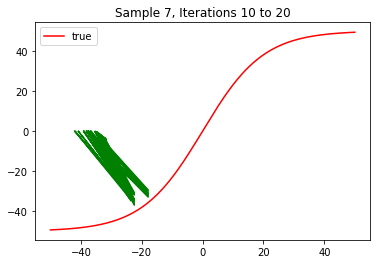

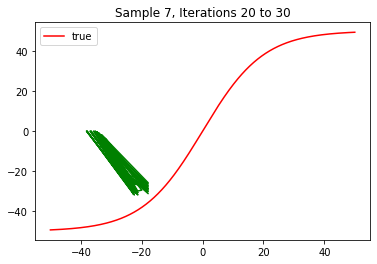

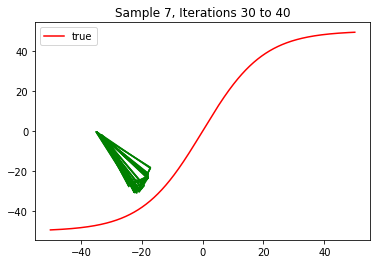

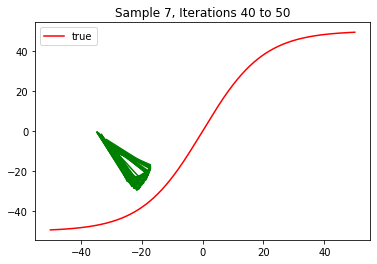

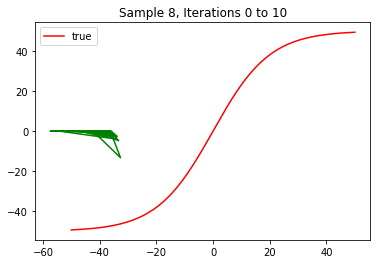

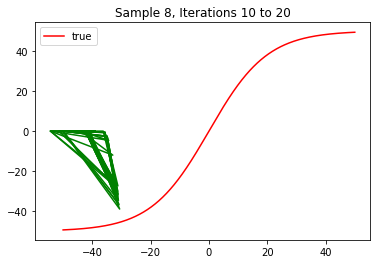

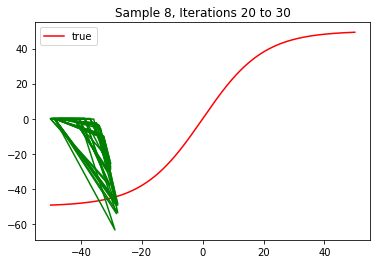

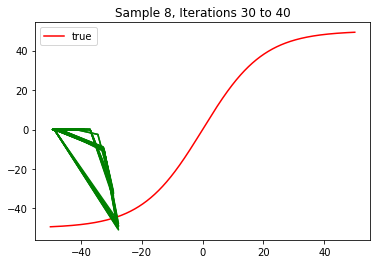

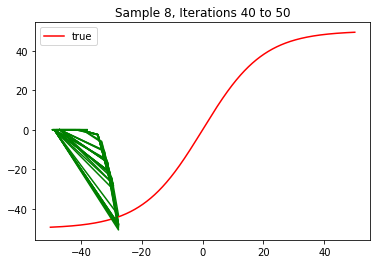

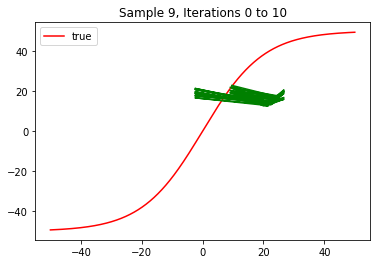

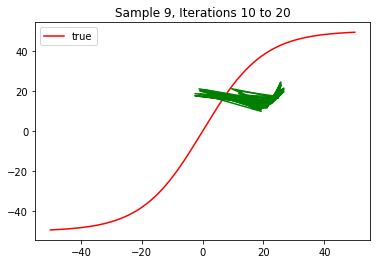

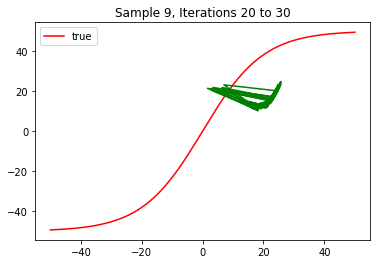

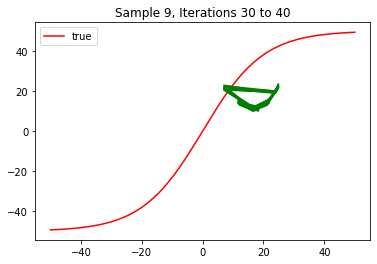

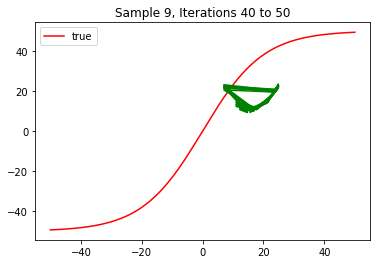

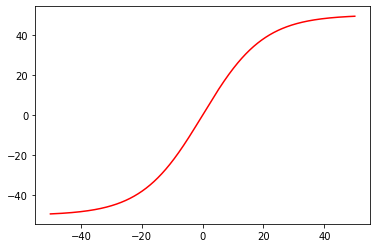

In [34]:
plt.figure()
plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true betas',c='red')
for k,tr in enumerate(trace_theta_spl): 
    for i in range(50):
        plt.plot(trace_x_spl[k][i], tr[i][2],c='green')
        if (i+1)%10==0:
            plt.title('Sample ' + str(k) + ', Iterations ' + str(i+1-10) + ' to ' + str(i+1))
            plt.legend()
            plt.show()
            plt.figure()
            plt.plot(np.linspace(-50,50,1000), betas_true, label = 'true',c='red')

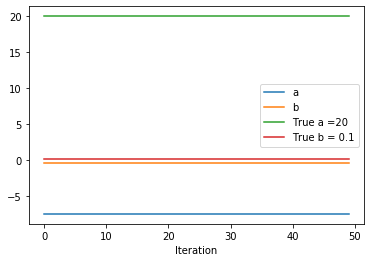

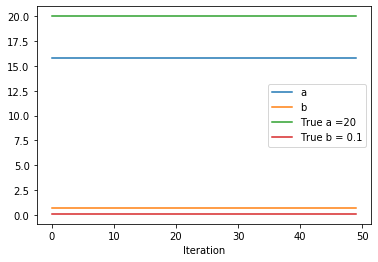

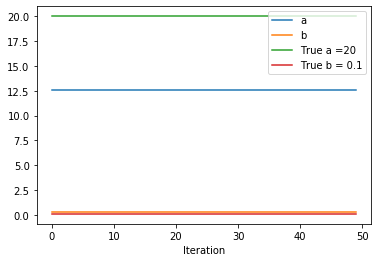

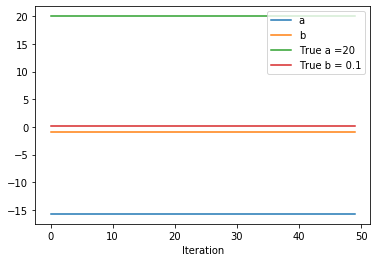

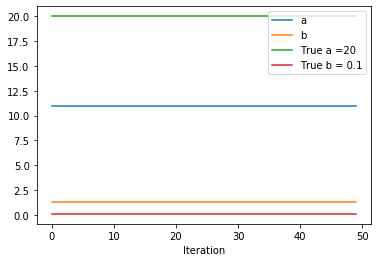

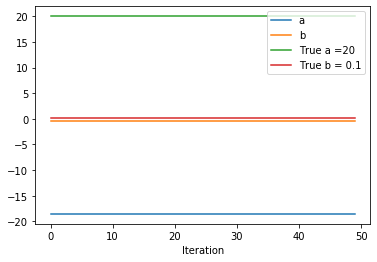

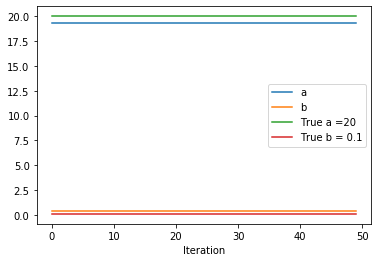

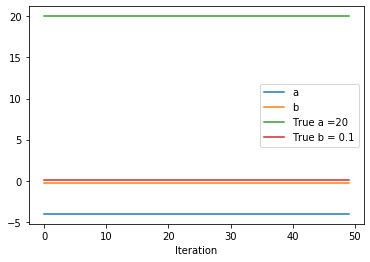

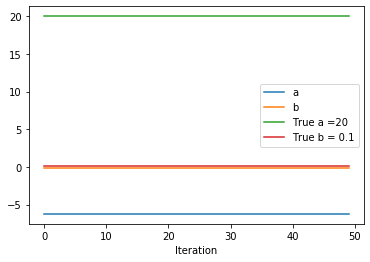

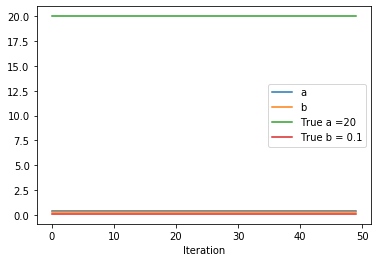

In [54]:
for tr in trace_theta2_spl:
    traces = list(zip(*tr))[0]
    a = list(zip(*traces))[0]
    b = list(zip(*traces))[1]
    plt.plot(range(len(tr)),a,label = 'a')
    plt.plot(range(len(tr)),b,label = 'b')
    plt.plot(range(len(tr)),20*np.ones(len(tr)),label = 'True a =20')
    plt.plot(range(len(tr)),.1*np.ones(len(tr)),label = 'True b = 0.1')
    plt.legend()
    plt.xlabel('Iteration')
    plt.show()